# Sampling S-Protein S-Peptide data

*Author: Björn Harink*  
*Date: 20180228*  
*Set: S-Protein - S-Peptide*  
*Description:* Sampling, down-sampling, up-sampling, using various resampling methods.

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd

# Import the mrbles package
import sys
sys.path.insert(0, r'G:\My Drive\[Stanford]\DEV\Encoded Beads Project\Bead Analysis')
import mrbles

# Regular plot graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')

# For fancy interactive Plotly graphs
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tools
from plotly.tools import FigureFactory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # For plotly offline mode
init_notebook_mode(connected=True)

# Additional
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model

Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford  - Version:  0.9.0


## Load MRBLE library information

Load excel file with information about the the MRBLES library. Please use example file.

Main information that needs to in there are the different ratios (e.g. Dy, Sm, Tm). The code number starts from 0 and is based on the row number. Additional code numbers can be given (for instance when using a partial code set), but this not influence the code calling. All additional columns  provided in the classes are added as information, with a `info.` as prefix.

In [2]:
mrbles_library_info = pd.read_excel(r'C:\DATA\Huy\20180325_SEQ_CN_Final-Match-List2.xlsx')

In [3]:
mrbles_library_info

code      sequence     full_sequence repeat      set        Dy        Sm  \
0      1     Scrambled         Scrambled     1A  Control  0.000000  0.000000   
1      2     Scrambled         Scrambled     1B  Control  0.000000  0.000000   
2      3    HPVIVITGPH  MAGPHPVIVITGPHEE     2A   PVIVIT  0.000000  0.000000   
3      4    HPVIVITGPH  MAGPHPVIVITGPHEE     2B   PVIVIT  0.000000  0.000000   
4      5    HPRIVITGPH  MAGPHPRIVITGPHEE     3A   PVIVIT  0.000000  0.000000   
5      6    HPLIVITGPH  MAGPHPLIVITGPHEE     4A   PVIVIT  0.000000  0.078841   
6      7    HPLIVITGPH  MAGPHPLIVITGPHEE     4B   PVIVIT  0.000000  0.078841   
7      8    HPVIVIEGPH  MAGPHPVIVIEGPHEE     5A   PVIVIT  0.000000  0.078841   
8      9    HPVIVIEGPH  MAGPHPVIVIEGPHEE     5B   PVIVIT  0.000000  0.078841   
9     10    HPRIVITGPH  MAGPHPRIVITGPHEE     3B   PVIVIT  0.000000  0.078841   
10    11    HPVIVLTGPH  MAGPHPVIVLTGPHEE     6A   PVIVIT  0.000000  0.175770   
11    12    HPVIVLTGPH  MAGPHPVIVLTGPHEE     6B   PVIVIT  0.000000  0.175770   
12    13    IPVIVITGPH  MAGPIPVIVITGPHEE     7A   PVIVIT  0.000000  0.175770   
13    14    IPVIVITGPH  MAGPIPVIVITGPHEE     7B   PVIVIT  0.000000  0.175770   
14    15    HPVIVITGLH  MAGPHPVIVITGLHEE     8A   PVIVIT  0.000000  0.175770   
15    16    HPVIVITMPH  MAGPHPVIVITMPHEE     9A   PVIVIT  0.000000  0.294920   
16    17    HPVIVITMPH  MAGPHPVIVITMPHEE     9B   PVIVIT  0.000000  0.294920   
17    18    HPKIVITGPH  MAGPHPKIVITGPHEE    10A   PKIVIT  0.000000  0.294920   
18    19    HPKIVITGPH  MAGPHPKIVITGPHEE    10B   PKIVIT  0.000000  0.294920   
19    20    HPKIIITGPH  MAGPHPKIIITGPHEE    11A   PKIVIT  0.000000  0.441400   
20    21    HPKIIITGPH  MAGPHPKIIITGPHEE    11B   PKIVIT  0.000000  0.441400   
21    22    HPKIVLTGPH  MAGPHPKIVLTGPHEE    12A   PKIVIT  0.000000  0.441400   
22    23    HPKIVLTGPH  MAGPHPKIVLTGPHEE    12B   PKIVIT  0.000000  0.441400   
23    24    HPKIVIQGPH  MAGPHPKIVIQGPHEE    13A   PKIVIT  0.000000  0.621480   
24    25    HPKIVIQGPH  MAGPHPKIVIQGPHEE    13B   PKIVIT  0.000000  0.621480   
25    26    IPKIVITGPH  MAGPIPKIVITGPHEE    14A   PKIVIT  0.000000  0.621480   
26    27    IPKIVITGPH  MAGPIPKIVITGPHEE    14B   PKIVIT  0.000000  0.621480   
27    28    TPKIVITGPH  MAGPTPKIVITGPHEE    15A   PKIVIT  0.000000  0.842860   
28    29    TPKIVITGPH  MAGPTPKIVITGPHEE    15B   PKIVIT  0.000000  0.842860   
29    30    HPKIVITTPH  MAGPHPKIVITTPHEE    16A   PKIVIT  0.058418  0.000000   
..   ...           ...               ...    ...      ...       ...       ...   
66    67  PIAIIITDTTIS  KRMEPIAIIITDTTIS    34B   AKAP79  0.136090  0.621480   
67    68  PIAIIITDYEIS  KRMEPIAIIITDYEIS    35A   AKAP79  0.136090  0.842860   
68    69  PIAIIITDYEIS  KRMEPIAIIITDYEIS    35B   AKAP79  0.239350  0.000000   
69    70  PPKIIITDTEIS  KRMEPPKIIITDTEIS    36A    Super  0.239350  0.000000   
70    71    HPVIVITGLH  MAGPHPVIVITGLHEE     8B   PVIVIT  0.239350  0.000000   
71    72  PPKIIITDTEIS  KRMEPPKIIITDTEIS    36B    Super  0.239350  0.078841   
72    73  PPKIIITDTSIS  KRMEPPKIIITDTSIS    37A    Super  0.239350  0.078841   
73    74  PPKIIITDTSIS  KRMEPPKIIITDTSIS    37B    Super  0.239350  0.175770   
74    75  LPRIIITPPYEL  ASGLLPRIIITPPYEL    38A    Super  0.239350  0.175770   
75    76  LPRIIITPPYEL  ASGLLPRIIITPPYEL    38B    Super  0.239350  0.294920   
76    77  SPRIEITPSHEL  ASGLSPRIEITPSHEL    39A   NFATc2  0.239350  0.294920   
77    78  SPRIEITPSHEL  ASGLSPRIEITPSHEL    39B   NFATc2  0.239350  0.441400   
78    79  SPRILITPSHEL  ASGLSPRILITPSHEL    40A   NFATc2  0.239350  0.441400   
79    80  SPRILITPSHEL  ASGLSPRILITPSHEL    40B   NFATc2  0.239350  0.621480   
80    81  SPRIAITPSHEL  ASGLSPRIAITPSHEL    41A   NFATc2  0.376640  0.000000   
81    82  SPRIAITPSHEL  ASGLSPRIAITPSHEL    41B   NFATc2  0.376640  0.000000   
82    83  SPRIEISPSHEL  ASGLSPRIEISPSHEL    42A   NFATc2  0.376640  0.078841   
83    84  SPRIEISPSHEL  ASGLSPRIEISPSHEL    42B   NFATc2  0.376640  0.078841   
84  

## Load images

In [4]:
image_folders = {#"32 nM" : r"C:\DATA\Huy\20180323 CN Final",
                 #"63 nM" : r"C:\DATA\Huy\20180323 CN Final", 
                 #"125 nM" : r"C:\DATA\Huy\20180323 CN Final",
                 #"250 nM" : r"C:\DATA\Huy\20180323 CN Final",
                 #"500 nM" : r"C:\DATA\Huy\20180323 CN Final",
                 #"1000 nM" : r"C:\DATA\Huy\20180323 CN Final",
                 "2000 nM" : r"C:\DATA\Huy\20180323 CN Final",
                 "Biotin" : r"C:\DATA\Huy\20180322 CN Final"
}
image_patterns = {#"32 nM" : r"20180322_CN_Final_high_32nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
                  #"63 nM" : r"20180322_CN_Final_high_63nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
                  #"125 nM" : r"20180322_CN_Final_high_125nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  #"250 nM" : "20180322_CN_Final_high_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  #"500 nM" : r"20180322_CN_Final_high_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  #"1000 nM" : r"20180322_CN_Final_high_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "2000 nM" : r"20180322_CN_Final_high_2uMb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "Biotin" : r"20180322_CN_Final_biotin_DPc_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
}

flat_field_image = r"Z:\Data\Setup 1\[Flat-Field and Dark-Field Setup 1]\20180328-FF-Cy5-E-81im-BIN2.tif"

mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)

Found 43 files in 2000 nM
Found 46 files in Biotin


In [5]:
mrbles_images.load()

Change channel names, so they are all the same.

In [6]:
mrbles_images.rename_channel('Cy5_5%', 'Cy5')
mrbles_images.rename_channel('Cy5 10%', 'Cy5')

Renaming channels to make them all the same.

Check channel names by selecting one of the image sets and add `.c`

In [7]:
mrbles_images.flat_field(flat_field_image, 'Cy5')

Cropping image to save memory.

In [8]:
mrbles_images.crop_x = slice(80, 940)
mrbles_images.crop_y = slice(100, 960)

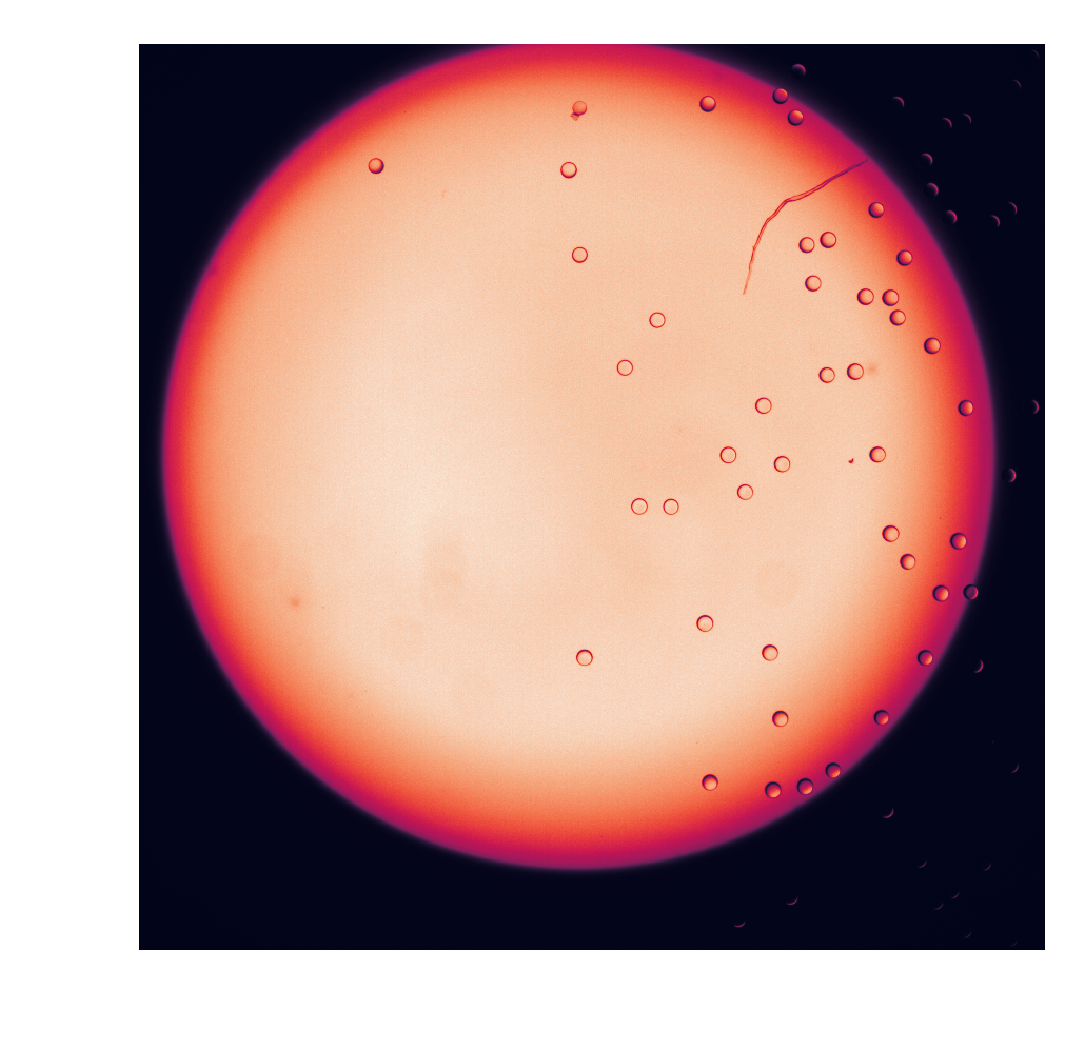

In [9]:
fig = plt.figure(dpi=300)
plt.axis('off')
plt.imshow(mrbles_images['Biotin', 10, 'Brightfield']);

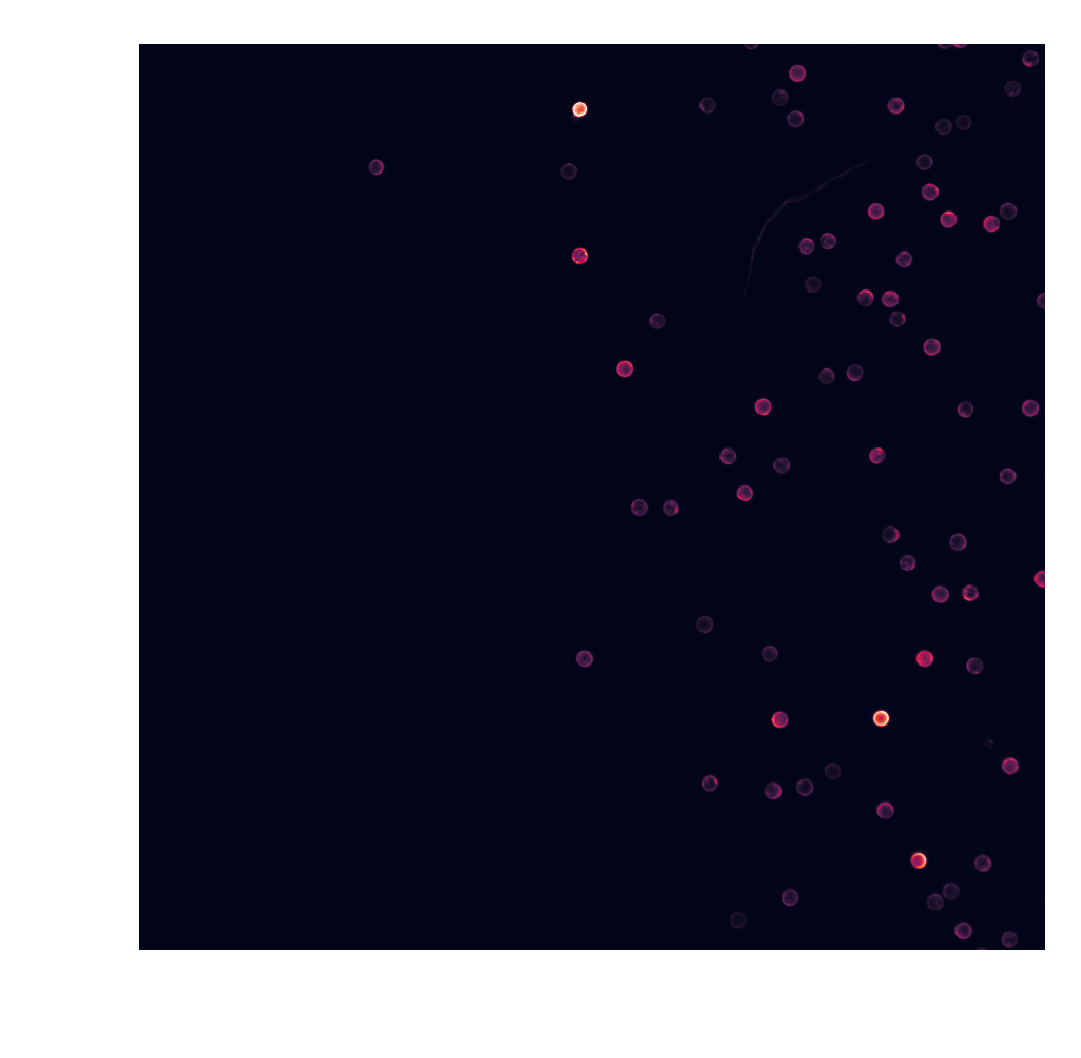

In [10]:
fig = plt.figure(dpi=300)
plt.axis('off')
plt.imshow(mrbles_images['Biotin', 10, 'Cy5']);

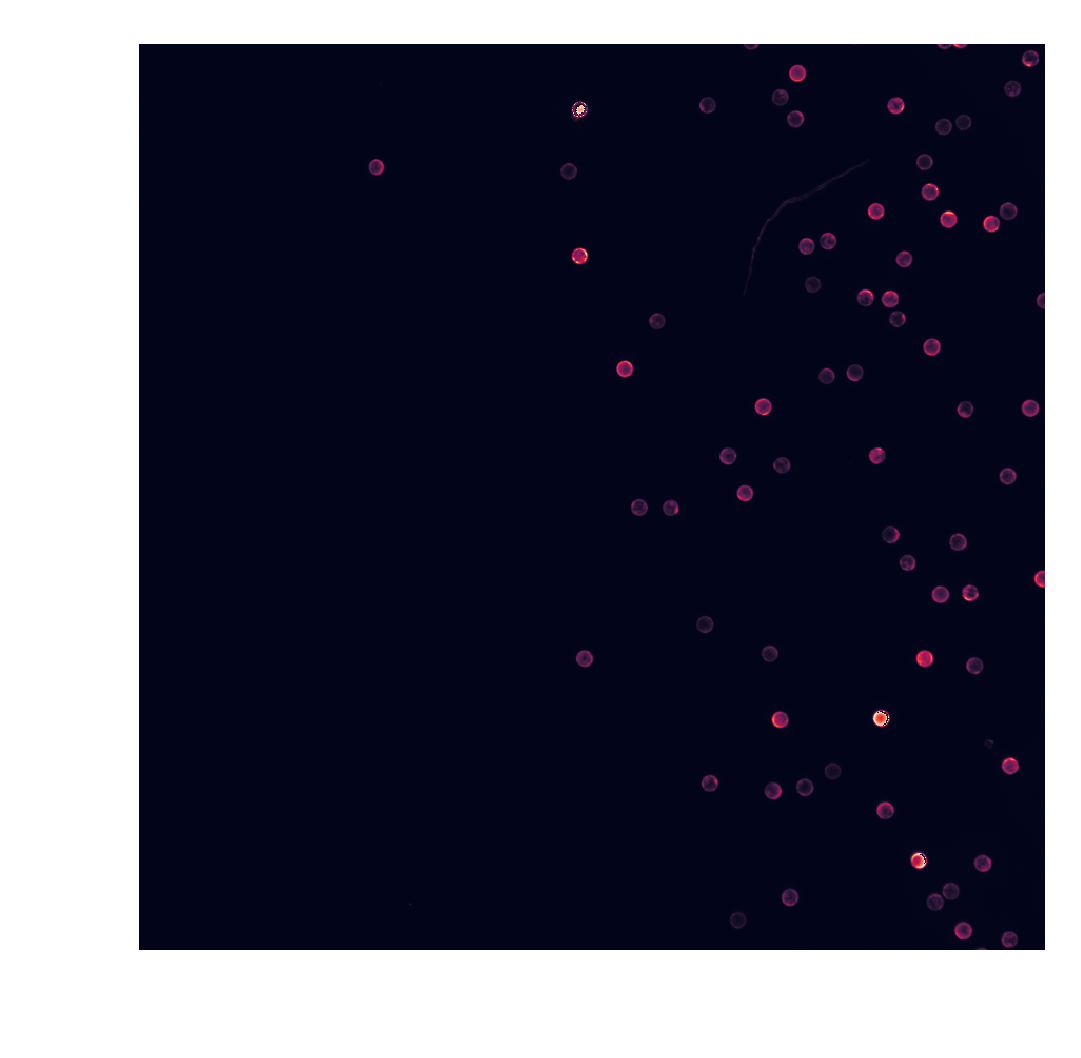

In [11]:
fig = plt.figure(dpi=300)
plt.axis('off')
plt.imshow(mrbles_images['Biotin', 10, 'Cy5_FF']);

## Find MRBLEs

Only use `find_mrbles.settings.parallelize = True` on workstations with multiple CPU cores (>4), otherwise there is no performance gain. It also uses way more memory since it has spawn multiple Python instances.

In [12]:
find_mrbles = mrbles.Find(bead_size=18, border_clear=True, circle_size=350)
find_mrbles.settings.parallelize = True

`find_mrbles.settings` is for internal settings. They all have a default setting, which should work in most cases. If necessary this can be tuned, however. Use `find_mrbles.settings` and then TAB to see a list of options.

Adaptive threshold imaging settings:  
`find_mrbles.settings.thr_block`: The scanning block size.  
`find_mrbles.settings.thr_c`: The leniency.  
Please see link for infomation: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html  
Use `find_mrbles.settings.img2bin()` for parameter testing. 

Filtering settings (default values are based on parameter `bead_size`):  
`find_mrbles.settings.area_min`: Minimum area. Default: area x 0.5.  
`find_mrbles.settings.area_max`: Maximum area. Default: area x 1.5.  
`find_mrbles.settings.eccen_max`: Maximum eccentricity (0 being most circle, 1 being least circle). Default: 0.65.

These attributes can be read by calling:  
`find_mrbles.settings.area_min` 

In [13]:
find_mrbles.settings.area_min

63.61725123519331

These attributes can be read by calling:  
`find_mrbles.settings.area_min = 60` 

In [14]:
find_mrbles.find(mrbles_images[:, : , 'Brightfield'])

Bead radius AVG: 15.53
Bead radius SD: 0.29
Bead radius CV: 1.84%
Total number of beads: 20386


Save bead dimensions if you like.

In [15]:
# find_mrbles.bead_dims.to_csv('bead-dims.csv')

Bead radius histogram. Chosen bead_size=18 (2xRadius) is good.

In [16]:
find_mrbles.bead_dims['diameter'] = find_mrbles.bead_dims.radius *2

(0, 0.8563104175619994)

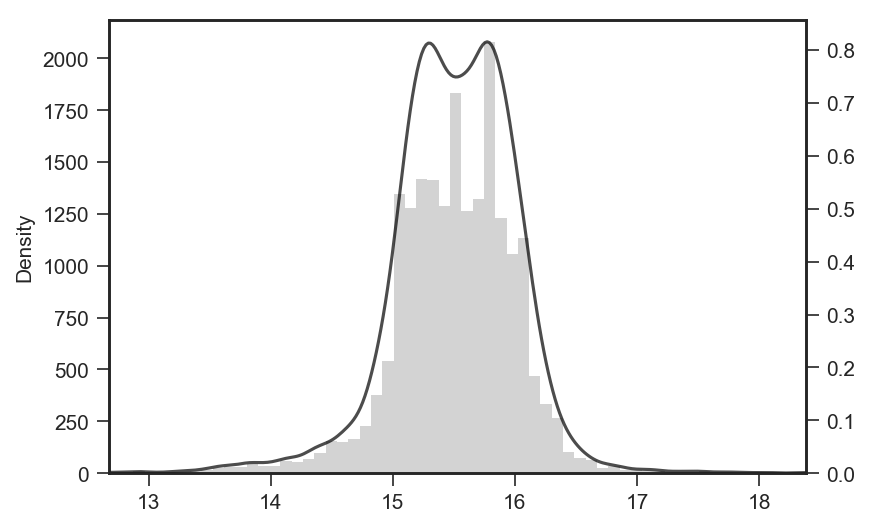

In [17]:
fig = plt.figure(dpi=150)
b_std = find_mrbles.bead_dims.diameter.std()
b_mean = find_mrbles.bead_dims.diameter.mean()
x_left = b_mean - (5*b_std)
x_right = b_mean + (5*b_std)
ax = find_mrbles.bead_dims.diameter.plot(kind='hist', bins=100, color='lightgray').set_xlim(left=x_left, right=x_right)
find_mrbles.bead_dims.diameter.plot(kind='kde', secondary_y=True, color='black', alpha=0.7).set_ylim(bottom=0)

Save image, if you like.

In [18]:
# fig.savefig('bead-dist.png', dpi=300)

In [19]:
find_mrbles['Biotin'].c

<xarray.DataArray 'c' (c: 6)>
array(['mask_full', 'mask_ring', 'mask_inside', 'mask_outside', 'mask_bkg',
       'mask_check'], dtype='<U12')
Coordinates:
  * c        (c) <U12 'mask_full' 'mask_ring' 'mask_inside' 'mask_outside' ...

In [21]:
find_mrbles.bead_dims.to_excel('bead_dims.xlsx')

Check multiple files if beads are found properly. Crosses are only properly visible at high DPI, since they are only 1 pixel wide.

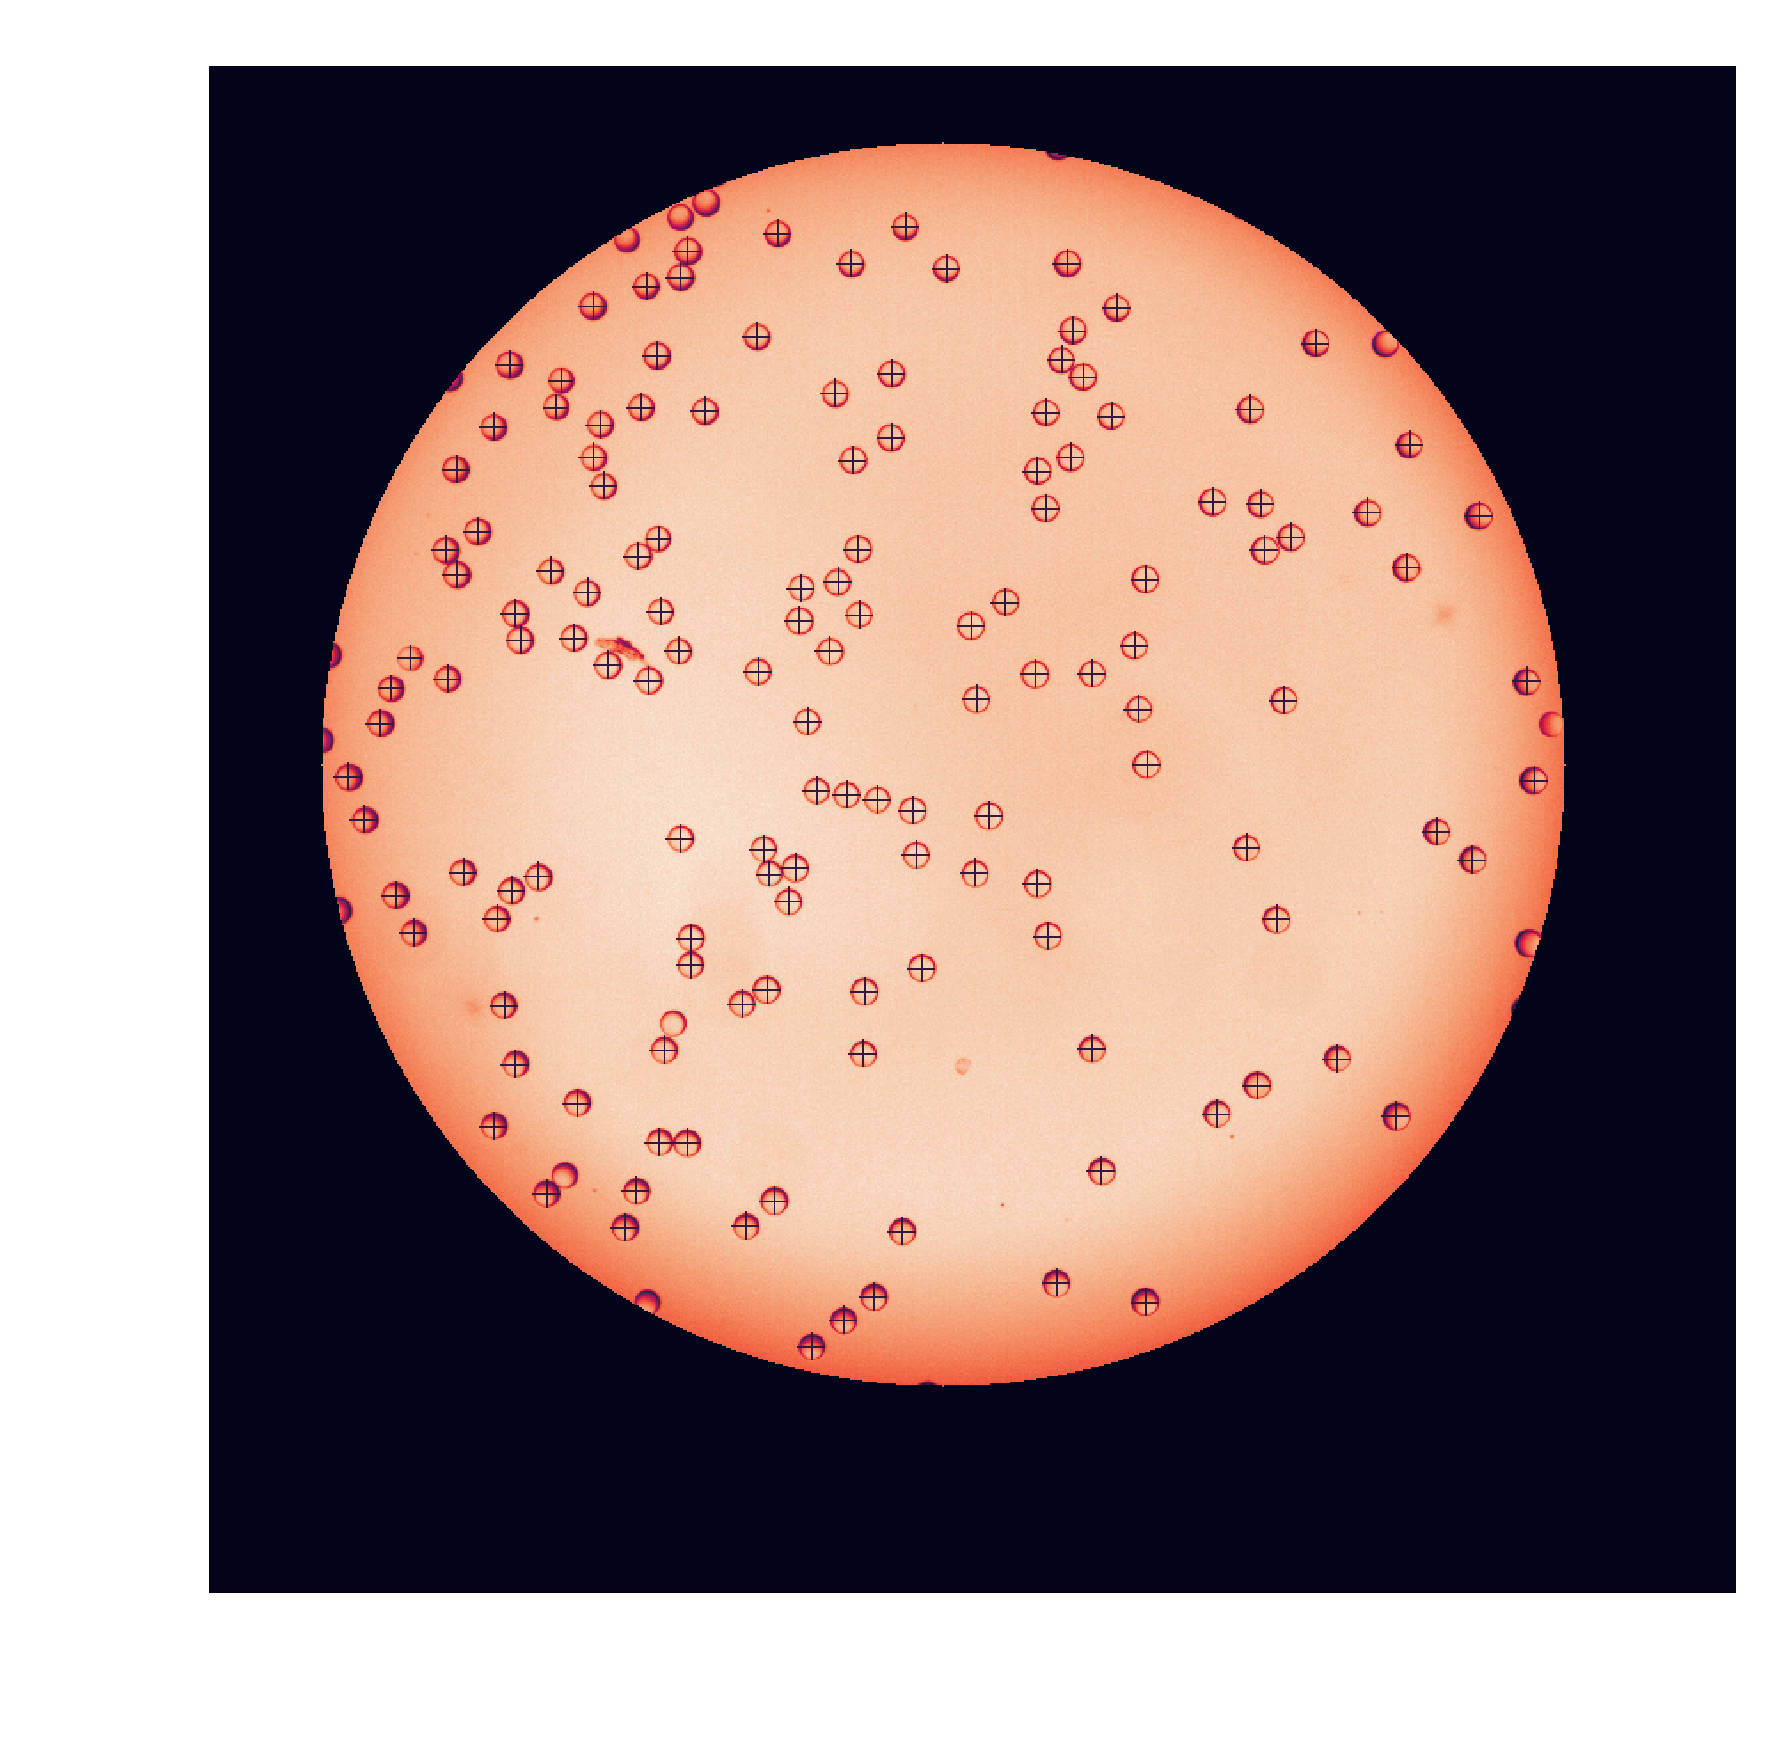

In [83]:
fig = plt.figure(dpi=450)
plt.axis('off')
plt.tight_layout()
plt.imshow(find_mrbles['Biotin', 1, 'mask_check']);

## Create reference spectra

Load all references and add background `bkg` image from the data-set to be invastigated. Choose region where there are no beads

In [84]:
# Channel settings
DECODE_CHANNELS = slice('l-435','l-780')  # Channel range for decoding
OBJECT_CHANNEL = 'Brightfield'  # Channel for bead finding

# Reference files
REF_FOLDER = {
    "Dy": r"C:\DATA\20170406 - Reference files - KARA",
    "Sm": r"C:\DATA\20170406 - Reference files - KARA",
    "Tm": r"C:\DATA\20170406 - Reference files - KARA",
    "Eu": r"C:\DATA\20170406 - Reference files - KARA",
    "bkg": r"C:\DATA\Huy\20180323 CN Final\20180322_CN_Final_high_1uM_1"
}
REF_FILES = {"Dy" : "Dy_Solos_3_MMStack_Pos0.ome.tif",
             "Sm" : "Sm_solos_5_MMStack_Pos0.ome.tif",
             "Tm" : "Tm_solos_3_MMStack_Pos0.ome.tif",
             "Eu" : "Eu_solos_6_MMStack_Pos0.ome.tif",
             "bkg" : "20180322_CN_Final_high_1uM_1_MMStack_Pos0.ome.tif"  # Always change this!
}

Set crop value, since there is no circular ROI finding in this one (not neceassary). Set `bkg_roi`.

In [85]:
spec_object = mrbles.References(REF_FOLDER, REF_FILES, OBJECT_CHANNEL, DECODE_CHANNELS, bead_size=18)
spec_object.crop_x = slice(262, 762)
spec_object.crop_y = slice(262, 762)
spec_object.bkg_roi = [slice(388, 542), slice(440, 620)]

Found 1 files in Dy
Found 1 files in Sm
Found 1 files in Tm
Found 1 files in Eu
Found 1 files in bkg


In [86]:
spec_object.load()

Bead radius AVG: 15.65
Bead radius SD: 0.84
Bead radius CV: 5.38%
Total number of beads: 1287


Check spectra and selected `bkg` region.

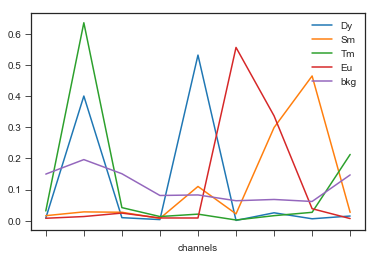

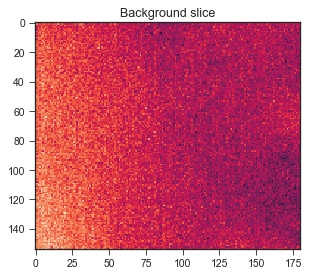

In [87]:
spec_object.plot()

## Spectral unmixing and get ratios

In [88]:
ratio_images = mrbles.Ratio(spec_object)

In [89]:
ratio_images.get(mrbles_images[:, :, DECODE_CHANNELS], 'Eu',  combine_data=mrbles_images[:, :, ['Cy5_FF']])

In [90]:
ratio_images['Biotin'].c

<xarray.DataArray 'c' (c: 9)>
array(['Cy5_FF', 'Dy', 'Dy_ratio', 'Eu', 'Sm', 'Sm_ratio', 'Tm', 'Tm_ratio',
       'bkg'], dtype=object)
Coordinates:
  * c        (c) object 'Cy5_FF' 'Dy' 'Dy_ratio' 'Eu' 'Sm' 'Sm_ratio' 'Tm' ...

Check inmixed images. Checking `Tm` and `bkg` since they share similar peak at 780 nm. If unmixing is not working properly it should show in the images.

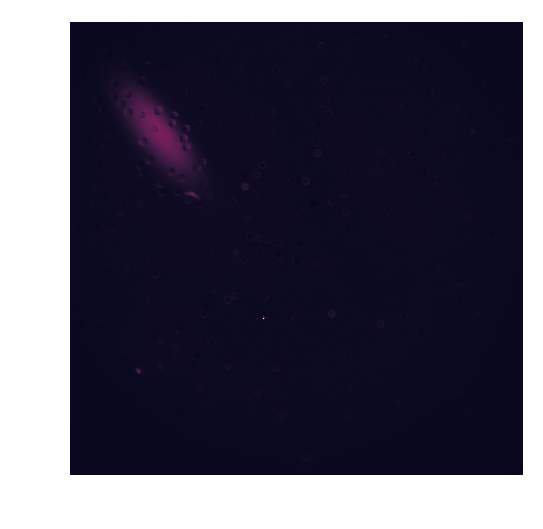

In [94]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(ratio_images['Biotin', 1, 'bkg']);

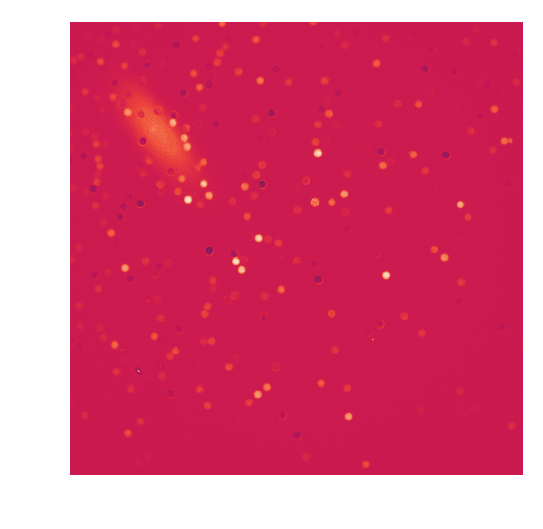

In [95]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(ratio_images['Biotin', 1, 'Tm']);

## Extract data from each MRBLE

This is the step to use the masks from bead finding and select all channels you want the intensities to be extracted using and select which masks.

In [93]:
extract_data = mrbles.Extract()

Select ratio images (for decoding), `Eu` and `bkg` (for filtering), and assay channels (e.g. Cy5). combine_data with bead dimensions.

In [96]:
extract_data.get(ratio_images[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5_FF']], 
                 find_mrbles[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']],
                 combine_data=find_mrbles.bead_dims)

If only one set, make sure the combined data matches! It is always possible to check. Make sure `label`  and, for instance `Tm_ratio.mask_lbl`,  are the same number in the eventual data!

In [87]:
# extract_data.get(ratio_images['7', :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5']], 
#                  find_mrbles['7', :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']],
#                  combine_data=find_mrbles.bead_dims[find_mrbles.bead_dims.set=='7'])

If there is at least Eu and an bkg image you can do additional filtering to make sure if there are any non-bead objects left from bead finding. This step is defenitely needed for subsequent decoding. Select the mask to be used for filtering. For lanthanide channels this is the inside reference (`Eu.mask_inside`) and for the background this is the outside (`bkg.mask_full`).

In [97]:
extract_data.filter(bkg_factor=2.0, ref_factor=2.0, bkg='bkg.mask_full', ref='Eu.mask_inside')

Pre-filter: 20386
Post-filter: 19713
Filtered: 673 (3.3%)


In [98]:
extract_data.data

index      set   f  bead_no  label  x_centroid  y_centroid    radius  \
0          0  2000 nM   0        0    5.0  684.539683  204.883598  7.756324   
1          1  2000 nM   0        1    6.0  439.701923  239.129808  8.136858   
2          2  2000 nM   0        2    7.0  435.934272  254.206573  8.234076   
3          3  2000 nM   0        3    8.0  708.105769  287.399038  8.136858   
4          4  2000 nM   0        4    9.0  728.243655  286.705584  7.918778   
5          5  2000 nM   0        5   10.0  241.000000  287.385417  7.817640   
6          6  2000 nM   0        6   11.0  539.536232  376.391304  8.117275   
7          7  2000 nM   0        7   12.0  391.500000  382.603774  8.214724   
8          8  2000 nM   0        8   13.0  537.514706  391.504902  8.058239   
9          9  2000 nM   0        9   14.0  292.831633  501.607143  7.898654   
10        10  2000 nM   0       10   15.0  357.979275  523.274611  7.837972   
11        11  2000 nM   0       11   16.0  352.105263  603.573684  7.776817   
12        12  2000 nM   1        0    4.0  449.738693   54.472362  7.958873   
13        13  2000 nM   1        1    5.0  358.607955   63.369318  7.484821   
14        14  2000 nM   1        2    6.0  457.681818   77.448864  7.484821   
15        15  2000 nM   1        3    7.0  536.922652   80.922652  7.590395   
16        16  2000 nM   1        4    8.0  443.521739   84.633540  7.158763   
17        17  2000 nM   1        5    9.0  503.805405   90.097297  7.673808   
18        18  2000 nM   1        6   10.0  455.941799   90.550265  7.756324   
19        19  2000 nM   1        7   11.0  481.464646   92.707071  7.938851   
20        20  2000 nM   1        8   12.0  297.612565   96.094241  7.797255   
21        21  2000 nM   1        9   13.0  444.303226   98.974194  7.024104   
22        22  2000 nM   1       10   14.0  469.106742  100.466292  7.527228   
23        23  2000 nM   1       11   16.0  514.164894  103.888298  7.735778   
24        24  2000 nM   1       12   17.0  264.500000  105.000000  7.898654   
25        25  2000 nM   1       13   18.0  337.331683  105.381188  8.018641   
26        26  2000 nM   1       14   19.0  529.964103  104.517949  7.878479   
27        27  2000 nM   1       15   20.0  380.288889  105.755556  7.569398   
28        28  2000 nM   1       16   22.0  495.288660  108.164948  7.858252   
29        29  2000 nM   1       17   24.0  444.633540  114.267081  7.158763   
...      ...      ...  ..      ...    ...         ...         ...       ...   
20356  20356   Biotin  45      360  412.0  545.292308  597.707692  7.878479   
20357  20357   Biotin  45      361  414.0  330.831522  600.032609  7.653040   
20358  20358   Biotin  45      362  415.0  606.399038  599.677885  8.136858   
20359  20359   Biotin  45      363  416.0  282.806630  607.110497  7.590395   
20360  20360   Biotin  45      364  417.0  336.942708  614.369792  7.817640   
20361  20361   Biotin  45      365  418.0  180.345946  616.221622  7.673808   
20362  20362   Biotin  45      366  419.0  526.456311  618.558252  8.097644   
20363  20363   Biotin  45      367  420.0  242.113514  622.886486  7.673808   
20364  20364   Biotin  45      368  422.0  385.165829  626.638191  7.958873   
20365  20365   Biotin  45      369  423.0  487.020513  627.923077  7.878479   
20366  20366   Biotin  45      370  424.0  506.245810  629.245810  7.548342   
20367  20367   Biotin  45      371  425.0  207.409836  634.540984  7.632215   
20368  20368   Biotin  45      372  426.0  254.350515  638.190722  7.858252   
20369  20369   Biotin  45      373  427.0  397.415301  639.377049  7.632215   
20370  20370   Biotin  45      374  428.0  287.192513  642.962567  7.715177   
20371  20371   Biotin  45      375  429.0  240.862857  644.640000  7.463527   
20372  20372   Biotin  45      376  430.0  301.454545  647.197861  7.715177   
20373  20373   Biotin  45      377  431.0  467.811828  647.537634  7.694520   
20374  20374   Biotin  45      378  432.0  360.046392  64

If you are only interested in the values and not the codes, you can save it and/or use it for subsequent analaysis. In that case you can also reduce the number of channels in the line above.

In [41]:
# extract_data.data.to_csv(r"filename.csv")

## Decoding

Set up the decode part of the pipeline. Give it the targets as first parameter (only the targets!), and optionally the additional MRBLEs library information.

In [103]:
mrbles_decode = mrbles.Decode(mrbles_library_info.loc[:, ['Dy', 'Sm', 'Tm']], seq_list=mrbles_library_info)
mrbles_decode.settings.icp._train = False

Combine the data into the `mrbles.Decode` object by accessing `extract_data.data` which holds the data frame.  
Make sure the order of target ratios (above) is the same order as the input (below).

Now run decoding. 

In [104]:
mrbles_decode.decode(extract_data.data.loc[:,('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], 
                     combine_data=extract_data.data)

Delta:  0.11497121395660788
Delta:  0.027643352824060403
Delta:  0.03473352959502747
Delta:  0.03828536259429007
Delta:  0.03790158098332483
Delta:  0.029646486805372255
Delta:  0.01307781047119433
Delta:  0.005322184759129516
Delta:  0.0016966907412723476
Delta:  0.0008766081978587321
Delta:  0.00034336544790016465
Delta:  6.046259176432638e-05
Converged after: 12
Number of unique codes found: 96
Missing codes: None
Silhouette Coefficient: 0.46330060470373763
AIC: 327138.1205880559
BIC: 334703.7038062037


Show data and plot data.

In [105]:
mrbles_decode.data

index      set   f  bead_no  label  x_centroid  y_centroid    radius  \
0          0  2000 nM   0        0    5.0  684.539683  204.883598  7.756324   
1          1  2000 nM   0        1    6.0  439.701923  239.129808  8.136858   
2          2  2000 nM   0        2    7.0  435.934272  254.206573  8.234076   
3          3  2000 nM   0        3    8.0  708.105769  287.399038  8.136858   
4          4  2000 nM   0        4    9.0  728.243655  286.705584  7.918778   
5          5  2000 nM   0        5   10.0  241.000000  287.385417  7.817640   
6          6  2000 nM   0        6   11.0  539.536232  376.391304  8.117275   
7          7  2000 nM   0        7   12.0  391.500000  382.603774  8.214724   
8          8  2000 nM   0        8   13.0  537.514706  391.504902  8.058239   
9          9  2000 nM   0        9   14.0  292.831633  501.607143  7.898654   
10        10  2000 nM   0       10   15.0  357.979275  523.274611  7.837972   
11        11  2000 nM   0       11   16.0  352.105263  603.573684  7.776817   
12        12  2000 nM   1        0    4.0  449.738693   54.472362  7.958873   
13        13  2000 nM   1        1    5.0  358.607955   63.369318  7.484821   
14        14  2000 nM   1        2    6.0  457.681818   77.448864  7.484821   
15        15  2000 nM   1        3    7.0  536.922652   80.922652  7.590395   
16        16  2000 nM   1        4    8.0  443.521739   84.633540  7.158763   
17        17  2000 nM   1        5    9.0  503.805405   90.097297  7.673808   
18        18  2000 nM   1        6   10.0  455.941799   90.550265  7.756324   
19        19  2000 nM   1        7   11.0  481.464646   92.707071  7.938851   
20        20  2000 nM   1        8   12.0  297.612565   96.094241  7.797255   
21        21  2000 nM   1        9   13.0  444.303226   98.974194  7.024104   
22        22  2000 nM   1       10   14.0  469.106742  100.466292  7.527228   
23        23  2000 nM   1       11   16.0  514.164894  103.888298  7.735778   
24        24  2000 nM   1       12   17.0  264.500000  105.000000  7.898654   
25        25  2000 nM   1       13   18.0  337.331683  105.381188  8.018641   
26        26  2000 nM   1       14   19.0  529.964103  104.517949  7.878479   
27        27  2000 nM   1       15   20.0  380.288889  105.755556  7.569398   
28        28  2000 nM   1       16   22.0  495.288660  108.164948  7.858252   
29        29  2000 nM   1       17   24.0  444.633540  114.267081  7.158763   
...      ...      ...  ..      ...    ...         ...         ...       ...   
20356  20356   Biotin  45      360  412.0  545.292308  597.707692  7.878479   
20357  20357   Biotin  45      361  414.0  330.831522  600.032609  7.653040   
20358  20358   Biotin  45      362  415.0  606.399038  599.677885  8.136858   
20359  20359   Biotin  45      363  416.0  282.806630  607.110497  7.590395   
20360  20360   Biotin  45      364  417.0  336.942708  614.369792  7.817640   
20361  20361   Biotin  45      365  418.0  180.345946  616.221622  7.673808   
20362  20362   Biotin  45      366  419.0  526.456311  618.558252  8.097644   
20363  20363   Biotin  45      367  420.0  242.113514  622.886486  7.673808   
20364  20364   Biotin  45      368  422.0  385.165829  626.638191  7.958873   
20365  20365   Biotin  45      369  423.0  487.020513  627.923077  7.878479   
20366  20366   Biotin  45      370  424.0  506.245810  629.245810  7.548342   
20367  20367   Biotin  45      371  425.0  207.409836  634.540984  7.632215   
20368  20368   Biotin  45      372  426.0  254.350515  638.190722  7.858252   
20369  20369   Biotin  45      373  427.0  397.415301  639.377049  7.632215   
20370  20370   Biotin  45      374  428.0  287.192513  642.962567  7.715177   
20371  20371   Biotin  45      375  429.0  240.862857  644.640000  7.463527   
20372  20372   Biotin  45      376  430.0  301.454545  647.197861  7.715177   
20373  20373   Biotin  45      377  431.0  467.811828  647.537634  7.694520   
20374  20374   Biotin  45      378  432.0  360.046392  64

Filter out beads with less than 0.95 Confidence Interval, and subtract background.

In [119]:
extract_set = mrbles_decode.data.loc[(mrbles_decode.data.confidence > 0.95)]
extract_set.loc[:, 'Cy5_FF_min_bkg'] = extract_set.loc[:, 'Cy5_FF.mask_ring'] - extract_set.loc[:, 'Cy5_FF.mask_bkg']

Bsically, at this step you have all the per-MRBLE information. This can be used to analyze your library. There are some more fucntions later on to analyze this data, and/or aggregate to per-code.

In [46]:
# extract_set.data.to_csv('filename.csv')

### Decode troube-shooting

The Delta must converge fairly quickly to 0, and steps usually does not exceed more than 15 steps. If you see many steps going up in Delta that usually means it is over-fitting. Always check the final clustering with a 2/3D plot (See below).

This could have many causes:
* Too many missing clusters (where you using a reduced code-set?)
* Clusters too noisy or too many outliers
* Wrong target file...

Solutions:
* Select only the targets (codes) that are actually in the data.
* Filter more in the Extract data step.
* Well you got that one...

Sometimes it can't find all the codes, this can have many causes as well:
* Actual missing clusters
* The ICP step failed (mis-alignment), which is necessary for proper classification
* Wrong target file...

Solutions:
* Select only the targets (codes) that are actually in the data.
* Filter more in the Extract data step.
* Well you got that one...

So basically it all the depends on the ICP step. If all solutions fail you can always try and train this step by flipping on by setting training to `True`:  `mrbles_decode.settings.icp._train = True`. This way the object you instantiated `mrbles_decode` remembers the ICP transformation matric and uses it when you use command `mrbls_decode.decode()`

Procuderes to try (in order):
* Find a (or several) condition(s) within your data-set to align on by trying out sets one by one.
* Train it on the initial test images you used for check the code set after you made it.
* Train it on another data-set with the same code ratios.

If you found a procedure that correctly found the codes. Apply it to the entire set with the same object `mrbls_decode.decode()`.

# Quality control

Now the fun begins. All the data is step-wise combined, and `Decode` is the last step, which holds all the data. Now we can check the quality of our code calling and assay.

For convenience we rename it to a shorter name:

In [122]:
mrbles_data = mrbles_decode.data

We can check how the data clusters in a fancy 3D fashion with Plotly:

In [123]:
confidence = 0.95

target_ratios = mrbles_library_info.loc[:, ['Dy', 'Sm', 'Tm']].values
colors = np.multiply(mrbles_data[(mrbles_data.confidence > confidence)].code.values.astype(int), np.ceil(255/len(target_ratios)))

bead_ratios_plot = go.Scatter3d(
    name='Bead ratios',
    x=mrbles_data.loc[(mrbles_data.confidence > confidence), ('Dy_ratio.mask_inside_icp')].values,
    y=mrbles_data.loc[(mrbles_data.confidence > confidence), ('Sm_ratio.mask_inside_icp')].values,
    z=mrbles_data.loc[(mrbles_data.confidence > confidence), ('Tm_ratio.mask_inside_icp')].values,
    text=mrbles_data.loc[(mrbles_data.confidence > confidence), ('code')].values + 1,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios_plot = go.Scatter3d(
    name='Target ratios',
    x=target_ratios[:,0],
    y=target_ratios[:,1],
    z=target_ratios[:,2],
    text=list(range(1, len(target_ratios)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        symbol="diamond"
    )
)

mean_ratios_plot = go.Scatter3d(
    name='GMM mean ratios',
    x=mrbles_decode.settings.gmm.means[:,0],
    y=mrbles_decode.settings.gmm.means[:,1],
    z=mrbles_decode.settings.gmm.means[:,2],
    text=list(range(1, len(target_ratios)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='red',
        opacity=0.5,
        symbol="diamond"
    )
)

data = [bead_ratios_plot, target_ratios_plot, mean_ratios_plot]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

But perhaps more informative. We can plot the initial Dy ratio as a histogram and then plot the 2D clusters of each Dy level.

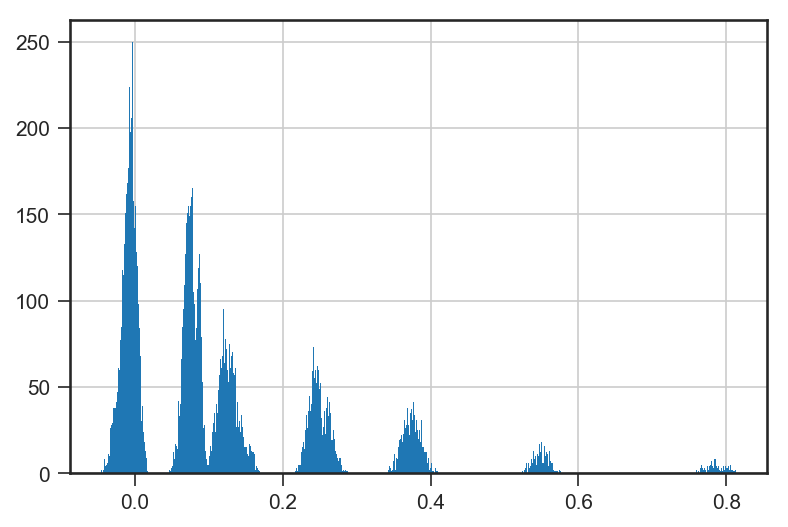

In [124]:
# Pandas
plt.figure(dpi=150)
extract_set['Dy_ratio.mask_inside_icp'].hist(bins=1000);

C:\Users\bjorn\.virtualenvs\Bead_Analysis-zAy6Vl3A\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



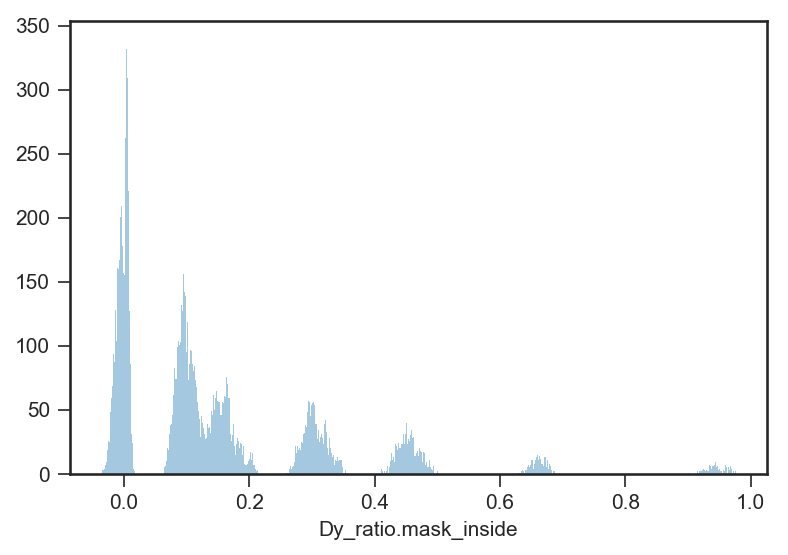

In [125]:
# Seaborn
fig = plt.figure(dpi=150)
sns.distplot(extract_set['Dy_ratio.mask_inside'], hist=True, kde=False, bins=1000);
# fig.savefig('Dy-Ratio.png')

This shows all the ratios in each Dy level for Tm vs Sm. It is not filtered based on confidence.

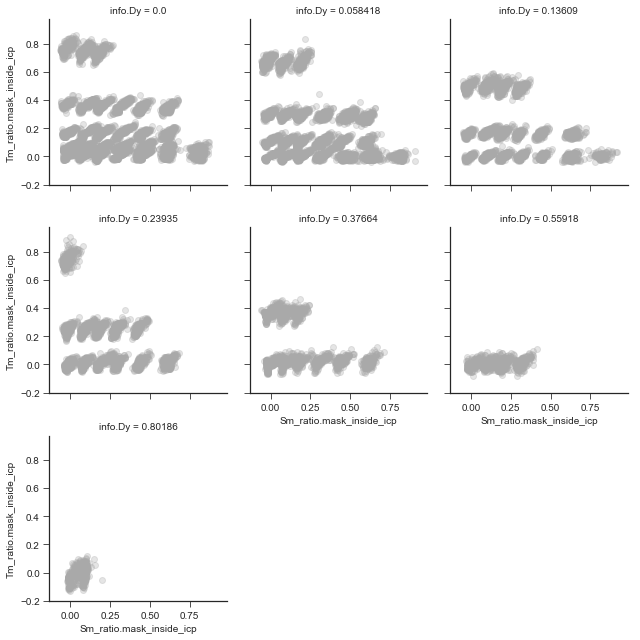

In [126]:
g = sns.FacetGrid(mrbles_data, col="info.Dy", col_wrap=3, sharey=True);
g.map(sns.regplot, 'Sm_ratio.mask_inside_icp', 'Tm_ratio.mask_inside_icp', fit_reg=False,
      scatter=True, scatter_kws={'alpha':0.3, 'color':'darkgray'}, line_kws={'color':'black'});
# g.savefig('Per-Dy-Level-SmTm.png', dpi=300)

We can now filter it based on the confidence (or log_prob):

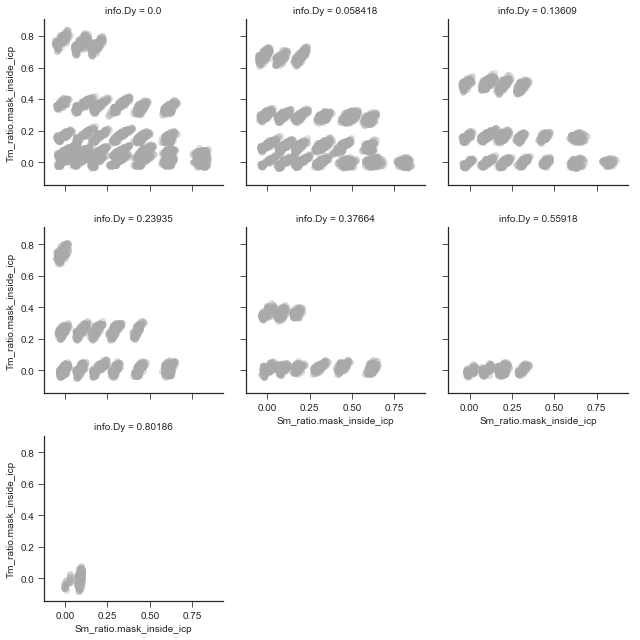

In [128]:
g = sns.FacetGrid(mrbles_data.query('confidence > 0.95'), col="info.Dy", col_wrap=3, sharey=True);
g.map(sns.regplot, 'Sm_ratio.mask_inside_icp', 'Tm_ratio.mask_inside_icp', fit_reg=False,
      scatter=True, scatter_kws={'alpha':0.3, 'color':'darkgray'}, line_kws={'color':'black'});
# g.savefig('Per-Dy-Level-SmTm-CI95.png', dpi=300)

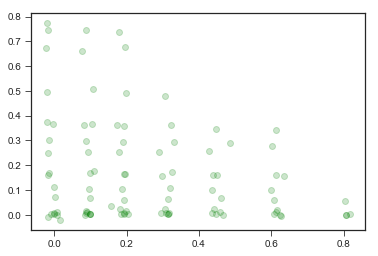

In [112]:
#g = sns.FacetGrid(mrbles_data.query('confidence > 0.95'), col="info.Dy", col_wrap=3, sharey=True);
#g.map(sns.regplot, 'Sm_ratio.mask_inside_icp', 'Tm_ratio.mask_inside_icp', fit_reg=False,
#      scatter=True, scatter_kws={'alpha':0.4, 'color':'darkgray'}, line_kws={'color':'black'});
sns.regplot(mrbles_decode.settings.gmm.means[:,1], mrbles_decode.settings.gmm.means[:,2], fit_reg=False,
      scatter=True, scatter_kws={'alpha':0.2, 'color':'green'}, line_kws={'color':'black'});

In [113]:
mrbles_decode.settings.gmm.means.shape

(96, 3)

In [114]:
mrbles_decode.settings.gmm.stds.shape

(96, 3, 3)

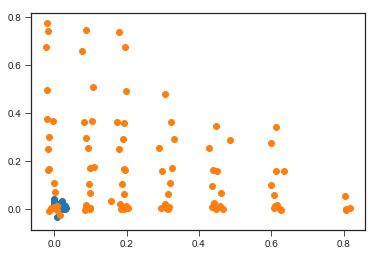

In [115]:
plt.figure()
plt.scatter(x=mrbles_decode.settings.gmm.stds[:,1,1:], y=mrbles_decode.settings.gmm.stds[:,2,1:])
plt.scatter(x=mrbles_decode.settings.gmm.means[:,1], y=mrbles_decode.settings.gmm.means[:,2])

### Cross-contamincation with assay dyes

Likewise we can check how the 'assay' (e.g. Cy5) channel might interfere with code calling. Which would show a trend up|down.

<Figure size 900x600 with 0 Axes>

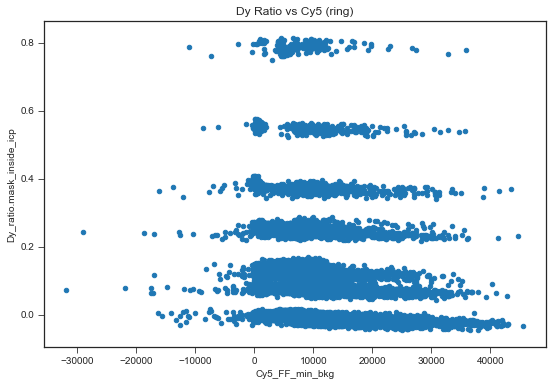

In [130]:
plt.figure(dpi=150);
extract_set.plot(kind='scatter', figsize = (9, 6), x='Cy5_FF_min_bkg', y='Dy_ratio.mask_inside_icp', 
                 title='Dy Ratio vs Cy5 (ring)');
# plt.savefig('Dy Ratio vs Cy5 (ring) - BKG.png',dpi=300)

<Figure size 900x600 with 0 Axes>

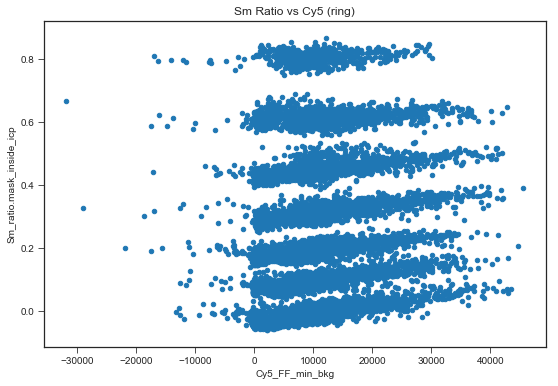

In [132]:
plt.figure(dpi=150);
extract_set.plot(kind='scatter', figsize = (9, 6), x='Cy5_FF_min_bkg', y='Sm_ratio.mask_inside_icp', 
                 title='Sm Ratio vs Cy5 (ring)');
plt.savefig('Sm Ratio vs Cy5 (ring) - BKG.png',dpi=300)

<Figure size 1800x1200 with 0 Axes>

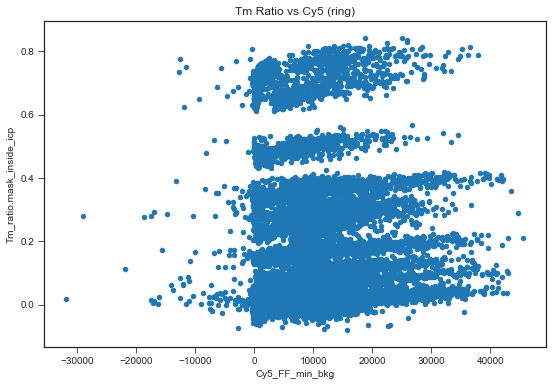

In [133]:
plt.figure(dpi=300);
extract_set.plot(kind='scatter', figsize = (9, 6), x='Cy5_FF_min_bkg', y='Tm_ratio.mask_inside_icp', 
                 title='Tm Ratio vs Cy5 (ring)');
plt.savefig('Tm Ratio vs Cy5 (ring) - BKG.png',dpi=300)

### Bead number vs Code

In [2]:
mrbles_data

In [135]:
mrbles_data.groupby(['set']).code.unique()

set
2000 nM    [25, 56, 55, 9, 82, 33, 83, 12, 28, 23, 68, 11...
Biotin     [61, 77, 13, 91, 3, 52, 4, 59, 40, 24, 11, 84,...
Name: code, dtype: object

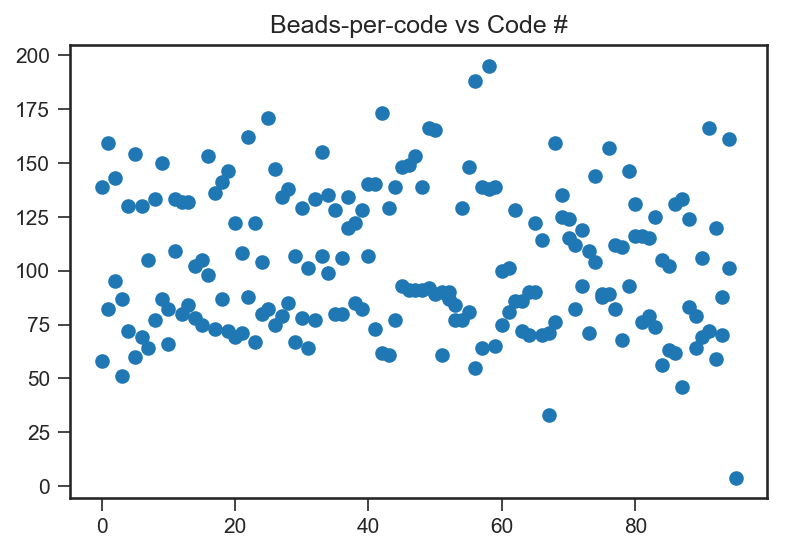

In [136]:
fig = plt.figure(dpi=150);
plt.title('Beads-per-code vs Code #');
plt.scatter(x=mrbles_data.groupby(['set', 'code']).code.unique(), y=mrbles_data.groupby(['set', 'code']).size());
fig.savefig('beads-per-code-per-set-scatter.png', dpi=300)

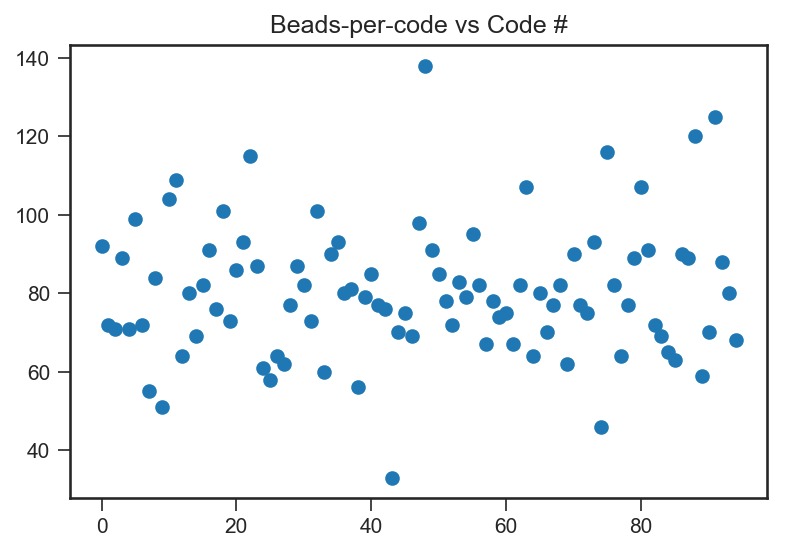

In [142]:
fig = plt.figure(dpi=150);
plt.title('Beads-per-code vs Code #');
plt.scatter(x=mrbles_data.loc[mrbles_data.set=='2000 nM'].code.unique(), y=mrbles_data[mrbles_data.set=='2000 nM'].groupby('code').size());
#fig.savefig('beads-per-code-1000.png', dpi=300)

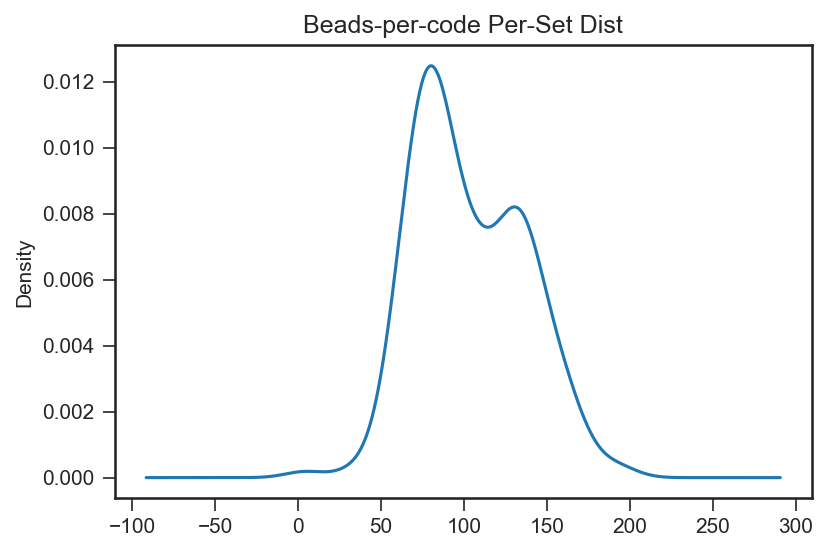

In [143]:
fig = plt.figure(dpi=150);
mrbles_data.groupby(['set','code']).size().plot(kind='kde', title="Beads-per-code Per-Set Dist");
fig.savefig('beads-per-code-per-set-dist.png', dpi=300)

### Biotin vs Code

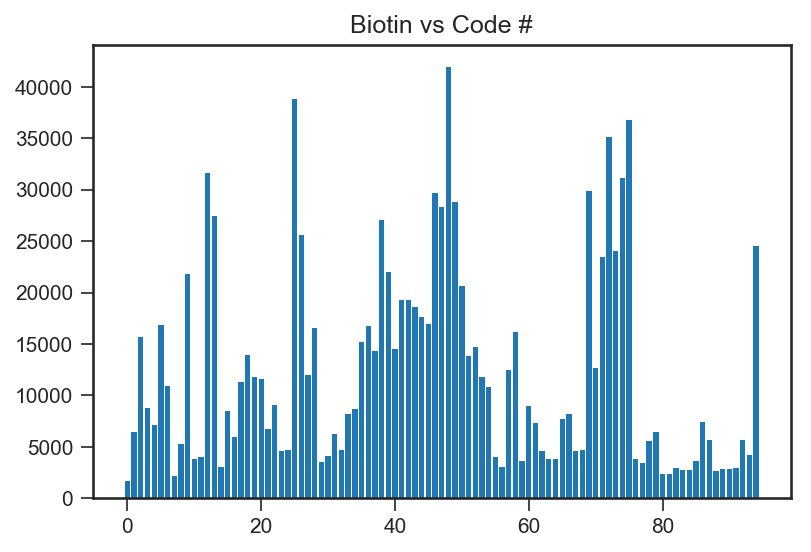

In [146]:
fig = plt.figure(dpi=150);
plt.title('Biotin vs Code #');
plt.bar(mrbles_data.loc[mrbles_data.set=='2000 nM', 'code'], mrbles_data.loc[mrbles_data.set=='2000 nM', 'Cy5_FF.mask_ring']);
# fig.savefig('biotin-vs-code.png', dpi=300)

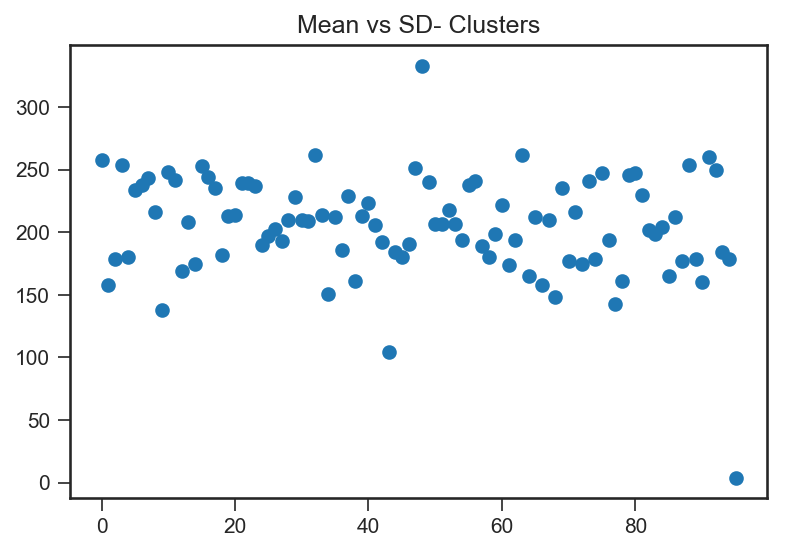

In [147]:
plt.figure(dpi=150);
plt.title('Mean vs SD- Clusters');
plt.scatter(x=mrbles_data['code'].unique(), y=mrbles_data.groupby('code').size());

In [148]:
Dy_means = mrbles_decode.settings.gmm.means[:,0]
Sm_means = mrbles_decode.settings.gmm.means[:,1]
Tm_means = mrbles_decode.settings.gmm.means[:,2]

In [149]:
Dy_cov = mrbles_decode.settings.gmm._gmix.covariances_[:, 0, 0]
Sm_cov = mrbles_decode.settings.gmm._gmix.covariances_[:, 1, 1]
Tm_cov = mrbles_decode.settings.gmm._gmix.covariances_[:, 2, 2]

In [150]:
Dy_sds = mrbles_decode.settings.gmm.stds[:, 0, 0]
Sm_sds = mrbles_decode.settings.gmm.stds[:, 1, 1]
Tm_sds = mrbles_decode.settings.gmm.stds[:, 2, 2]

In [151]:
Dy_mask = ((mrbles_library_info.Sm==0) & (mrbles_library_info.Sm==0))
Sm_mask = ((mrbles_library_info.Dy==0) & (mrbles_library_info.Tm==0))
Tm_mask = ((mrbles_library_info.Dy==0) & (mrbles_library_info.Sm==0))
DyTm_mask = ((mrbles_library_info.Sm==0) & (mrbles_library_info.Tm>0))
DySm_mask = ((mrbles_library_info.Tm==0) & (mrbles_library_info.Sm>0))
SmTm_mask = ((mrbles_library_info.Dy==0) & (mrbles_library_info.Tm>0))
SmDy_mask = ((mrbles_library_info.Tm==0) & (mrbles_library_info.Dy>0))
TmSm_mask = ((mrbles_library_info.Dy==0) & (mrbles_library_info.Sm>0))
TmDy_mask = ((mrbles_library_info.Sm==0) & (mrbles_library_info.Dy>0))

Dy_masks_means = np.array([Dy_means[Dy_mask], 
                  Dy_means[DyTm_mask], 
                  Dy_means[DySm_mask]])
Dy_masks_sds = np.array([Dy_sds[Dy_mask], 
                Dy_sds[DyTm_mask], 
                Dy_sds[DySm_mask]])

Sm_masks_means = np.array([Sm_means[Sm_mask], 
                  Sm_means[SmTm_mask], 
                  Sm_means[SmDy_mask]])
Sm_masks_sds = np.array([Sm_sds[Sm_mask], 
                Sm_sds[SmTm_mask], 
                Sm_sds[SmDy_mask]])

Tm_masks_means = np.array([Tm_means[Tm_mask], 
                  Tm_means[TmSm_mask], 
                  Tm_means[TmDy_mask]])
Tm_masks_sds = np.array([Tm_sds[Tm_mask], 
                Tm_sds[TmSm_mask], 
                Tm_sds[TmDy_mask]])

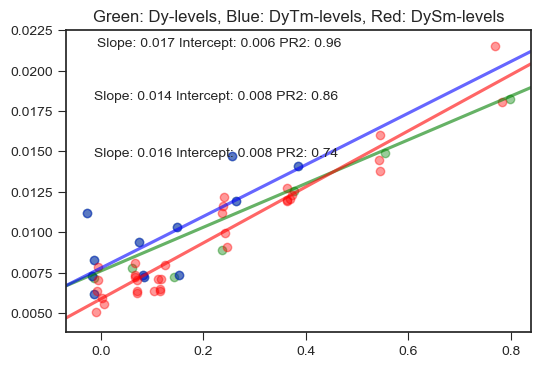

In [153]:
colors = ['green', 'blue', 'red']
fig, ax = plt.subplots(dpi=100);
plt.title('Green: Dy-levels, Blue: DyTm-levels, Red: DySm-levels')
n=0
for X1, y1 in zip(Dy_masks_means, Dy_masks_sds):
    regr = linear_model.LinearRegression()
    X =X1.reshape(-1,1)
    y = y1.reshape(-1,1)
    regr.fit(X, y)
    slope = regr.coef_[0]
    intercept = regr.intercept_
    r2 = sp.stats.pearsonr(X, y)[0]
    sns.regplot(x=X, y=y, ci=None, ax=ax, scatter=True, 
                scatter_kws={'alpha':0.4, 'color':colors[n]}, 
                line_kws={'alpha':0.6, 'color':colors[n]});
    plt.annotate('Slope: %0.3f Intercept: %0.3f PR2: %0.2f'%(slope, intercept, r2), xy=(X[1], max(y)));
    n+=1
#plt.savefig('Dy-MeanSD.png',  dpi=300)

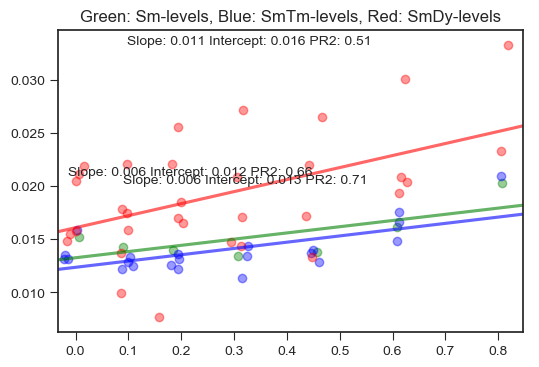

In [154]:
colors = ['green', 'blue', 'red']
fig, ax = plt.subplots(dpi=100);
plt.title('Green: Sm-levels, Blue: SmTm-levels, Red: SmDy-levels')
n=0
for X1, y1 in zip(Sm_masks_means, Sm_masks_sds):
    regr = linear_model.LinearRegression()
    X =X1.reshape(-1,1)
    y = y1.reshape(-1,1)
    regr.fit(X, y)
    slope = regr.coef_[0]
    intercept = regr.intercept_
    r2 = sp.stats.pearsonr(X, y)[0]
    sns.regplot(x=X, y=y, ci=None, ax=ax, scatter=True, 
                scatter_kws={'alpha':0.4, 'color':colors[n]}, 
                line_kws={'alpha':0.6, 'color':colors[n]});
    plt.annotate('Slope: %0.3f Intercept: %0.3f PR2: %0.2f'%(slope, intercept, r2), xy=(X[1], max(y)));
    n+=1
#plt.savefig('Sm-MeanSD.png',  dpi=300)

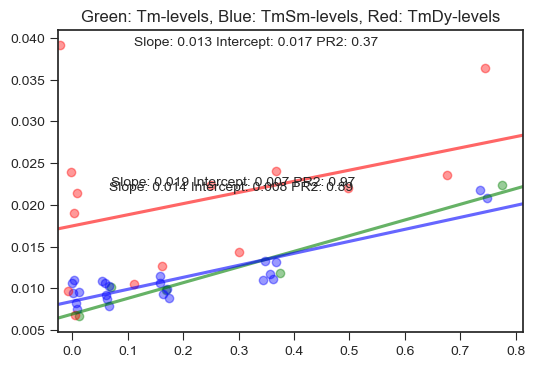

In [155]:
colors = ['green', 'blue', 'red']
fig, ax = plt.subplots(dpi=100);
plt.title('Green: Tm-levels, Blue: TmSm-levels, Red: TmDy-levels')
n=0
for X1, y1 in zip(Tm_masks_means, Tm_masks_sds):
    regr = linear_model.LinearRegression()
    X =X1.reshape(-1,1)
    y = y1.reshape(-1,1)
    regr.fit(X, y)
    slope = regr.coef_[0]
    intercept = regr.intercept_
    r2 = sp.stats.pearsonr(X, y)[0]
    sns.regplot(x=X, y=y, ci=None, ax=ax, scatter=True, 
                scatter_kws={'alpha':0.4, 'color':colors[n]}, 
                line_kws={'alpha':0.6, 'color':colors[n]});
    plt.annotate('Slope: %0.3f Intercept: %0.3f PR2: %0.2f'%(slope, intercept, r2), xy=(X[1], max(y)));
    n+=1
#plt.savefig('Tm-MeanSD.png', dpi=300)

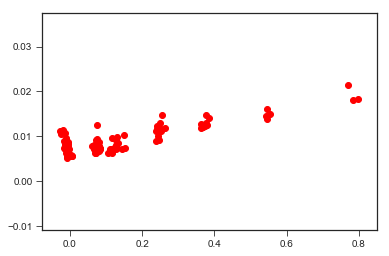

In [156]:
plt.figure()
plt.scatter(x=Dy_means, y=Dy_sds, color='red')

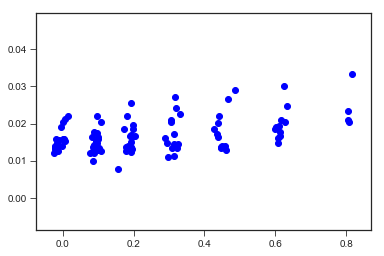

In [157]:
plt.figure()
plt.scatter(x=Sm_means, y=Sm_sds, color='blue')

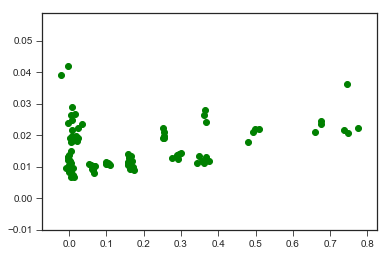

In [158]:
plt.figure()
plt.scatter(x=Tm_means, y=Tm_sds, color='green')

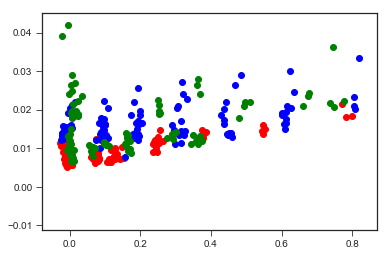

In [159]:
plt.figure()
plt.scatter(x=Dy_means, y=Dy_sds, color='red')
plt.scatter(x=Sm_means, y=Sm_sds, color='blue')
plt.scatter(x=Tm_means, y=Tm_sds, color='green')

In [160]:
Dy_mask = ((mrbles_library_info.Sm==0) & (mrbles_library_info.Sm==0))
Sm_mask = ((mrbles_library_info.Dy==0) & (mrbles_library_info.Tm==0))
Tm_mask = ((mrbles_library_info.Dy==0) & (mrbles_library_info.Sm==0))

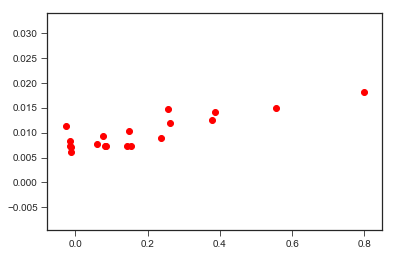

In [161]:
plt.figure()
plt.scatter(x=Dy_means[Dy_mask], y=Dy_sds[Dy_mask], color='red')

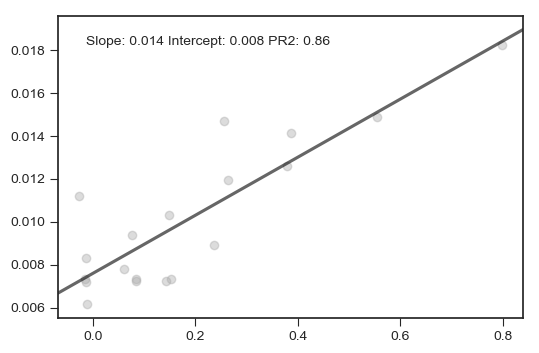

In [162]:
regr = linear_model.LinearRegression()
X = Dy_means[Dy_mask].reshape(-1,1)
y = Dy_sds[Dy_mask].reshape(-1,1)
regr.fit(X, y)
slope = regr.coef_[0]
intercept = regr.intercept_
r2 = sp.stats.pearsonr(X, y)[0]

fig, ax = plt.subplots(dpi=100);
Dy_mask_plot = sns.regplot(x=X, y=y, ci=None, ax=ax, scatter=True, 
                           scatter_kws={'alpha':0.4, 'color':'darkgray'}, 
                           line_kws={'alpha':0.6, 'color':'black'});
plt.annotate('Slope: %0.3f Intercept: %0.3f PR2: %0.2f'%(slope, intercept, r2), xy=(X[0], max(y)));

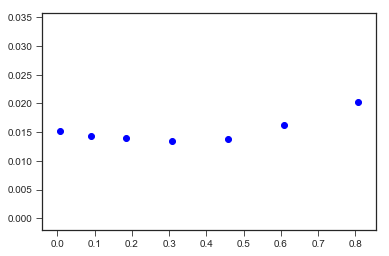

In [163]:
plt.figure()
plt.scatter(x=Sm_means[Sm_mask], y=Sm_sds[Sm_mask], color='blue')

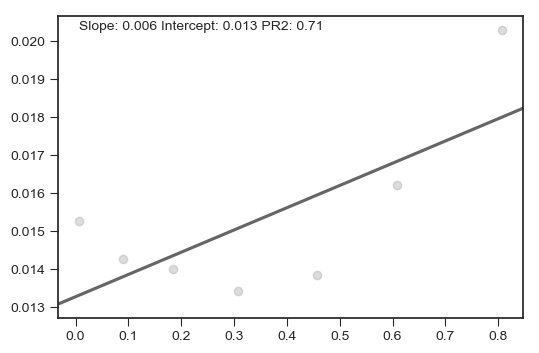

In [164]:
regr = linear_model.LinearRegression()
X = Sm_means[Sm_mask].reshape(-1,1)
y = Sm_sds[Sm_mask].reshape(-1,1)
regr.fit(X, y)
slope = regr.coef_[0]
intercept = regr.intercept_
r2 = sp.stats.pearsonr(X, y)[0]

fig, ax = plt.subplots(dpi=100)
Sm_mask_plot = sns.regplot(x=X, y=y, ci=None, ax=ax,
              scatter=True, 
              scatter_kws={'alpha':0.4, 'color':'darkgray'}, 
              line_kws={'alpha':0.6, 'color':'black'});
plt.annotate('Slope: %0.3f Intercept: %0.3f PR2: %0.2f'%(slope, intercept, r2), xy=(X[0], max(y)));

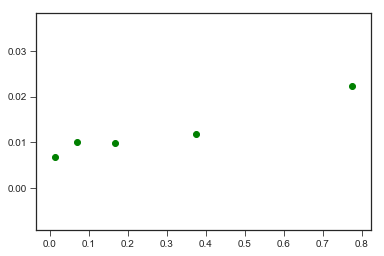

In [165]:
plt.figure()
plt.scatter(x=Tm_means[Tm_mask], y=Tm_sds[Tm_mask], color='green')

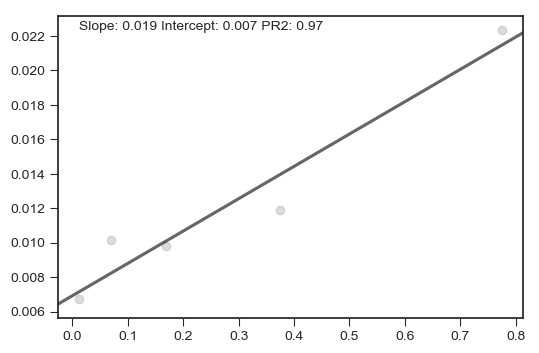

In [166]:
regr = linear_model.LinearRegression()
X = Tm_means[Tm_mask].reshape(-1,1)
y = Tm_sds[Tm_mask].reshape(-1,1)
regr.fit(X, y)
slope = regr.coef_[0]
intercept = regr.intercept_
r2 = sp.stats.pearsonr(X, y)[0]

plt.figure(dpi=100);
Tm_mask_plot = sns.regplot(x=X, y=y, ci=None, 
              scatter=True, 
              scatter_kws={'alpha':0.4, 'color':'darkgray'}, 
              line_kws={'alpha':0.6, 'color':'black'});
plt.annotate('Slope: %0.3f Intercept: %0.3f PR2: %0.2f'%(slope, intercept, r2), xy=(X[0], max(y)));

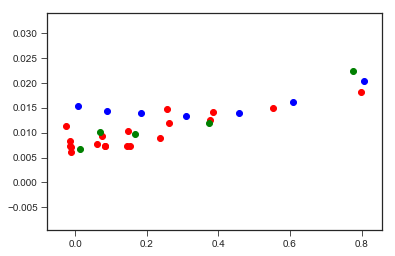

In [167]:
plt.figure()
plt.scatter(x=Dy_means[Dy_mask], y=Dy_sds[Dy_mask], color='red')
plt.scatter(x=Sm_means[Sm_mask], y=Sm_sds[Sm_mask], color='blue')
plt.scatter(x=Tm_means[Tm_mask], y=Tm_sds[Tm_mask], color='green')

In [168]:
DyTm_mask = (mrbles_library_info.Sm==0)
DySm_mask = (mrbles_library_info.Tm==0)
SmTm_mask = (mrbles_library_info.Dy==0)

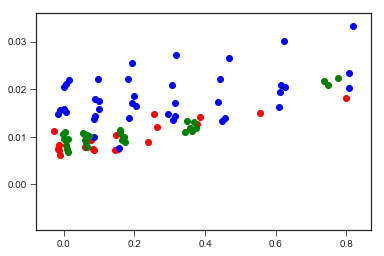

In [169]:
plt.figure()
plt.scatter(x=Dy_means[DyTm_mask], y=Dy_sds[DyTm_mask], color='red')
plt.scatter(x=Sm_means[DySm_mask], y=Sm_sds[DySm_mask], color='blue')
plt.scatter(x=Tm_means[SmTm_mask], y=Tm_sds[SmTm_mask], color='green')

## Bead Sampling

In [174]:
def balance_data(data, sample_method, channel):
    #data = data_set.loc[set_key, [channel, 'code', 'seq']]
    data[channel].dropna(inplace=True)
    codes = np.unique(data.code)
    #codes = codes[~np.isnan(codes)]
    print("Codes: ", codes)
    data_grouped = data.groupby('code')
    min_codes = data_grouped.size().min()
    max_codes = data_grouped.size().max()
    print("Min codes:", min_codes, "\nMax codes:", max_codes)
    median_codes = data_grouped.size().median()
    mean_codes = data_grouped.size().mean()
    std_codes = data_grouped.size().std()
    print("Median codes:", int(median_codes), "\nMean codes:", int(mean_codes), "\nSD codes:", int(std_codes))
    data_grouped.size().plot(kind='kde', title="Bead number per-code")
    if sample_method == 'up':
        data_sampled = data_grouped.apply(lambda x: x.sample(max_codes, replace=True))
    elif sample_method == 'down':
        data_sampled = data_grouped.apply(lambda x: x.sample(min_codes))
    elif sample_method == 'down-random':
        rus = RandomUnderSampler(return_indices=True)
        X_rus, y_rus, id_rus = rus.fit_sample(data[channel].values.reshape(-1, 1), data.code.values.reshape(-1, 1))
        X_rus2, y_rus2, id_rus2 = rus.fit_sample(data[channel].values.reshape(-1, 1), data['info.sequence'].values.reshape(-1, 1))
        print('Removed indexes:', id_rus)
        data_array = np.array([X_rus[:,0], y_rus, y_rus2]).T
        data_sampled = pd.DataFrame(data_array, columns=[channel, 'code', 'info.sequence'])
    elif sample_method == 'up-random':
        ros = RandomOverSampler()
        X_ros, y_ros = ros.fit_sample(data[channel].values.reshape(-1, 1), data.code.values.reshape(-1, 1))
        #X_ros2, y_ros2 = ros.fit_sample(data[channel].values.reshape(-1, 1), data['info.sequence'].values.reshape(-1, 1))
        print('New random picked points:', X_ros.shape[0] - data[channel].shape[0])
        #data_array = np.array([X_ros[:,0], y_ros, y_ros2]).T
        data_array = np.array([X_ros[:,0], y_ros]).T
        #print(data_array.shape)
        #print(X_ros[:,0].shape)
        #print(y_ros.shape)
        #print(y_ros2.shape)
        #data_array = [X_ros[:,0], y_ros, y_ros2]
        #data_sampled = pd.DataFrame(data_array, columns=[channel, 'code', 'info.sequence'])
        data_sampled = pd.DataFrame(data_array, columns=[channel, 'code'])
    return data_sampled.reset_index(drop=True)

In [175]:
def step_sample(data, channel='Cy5_min_bkg', num_start=2, num_step=2, x_step=None, confidence=0.95):
    data.dropna(inplace=True)
    data.reset_index(drop=True, inplace=True)
    codes = np.unique(data.code)
    #codes = codes[~np.isnan(codes)]
    data_grouped = data.groupby('code')
    max_per_code = data_grouped.size().max()
    sample_steps = []
    data_step_sampled_df = []
    data_step_sampled_df_all = []
    while num_start <= max_per_code:
        sample_steps.append(num_start)
        data_sampled = data_grouped.apply(lambda x: x.sample(num_start))
        data_step_sampled_df_all.append(data_sampled)
        data_step_sampled = {}
        #data_step_sampled['sequence'] = data_sampled.loc[:, 'info.sequence'].astype(str).groupby('code').first()
        #print(data_step_sampled['sequence'])
        data_step_sampled['mean'] = data_sampled.loc[:, channel].astype(float).groupby('code').mean()
        data_step_sampled['median'] = data_sampled.loc[:, channel].astype(float).groupby('code').median()
        data_step_sampled['SD'] = data_sampled.loc[:, channel].astype(float).groupby('code').std()
        data_step_sampled['SE'] = data_step_sampled['SD'] / np.sqrt(num_start)
        data_step_sampled['SE_median_up'] = data_step_sampled['median'] - data_step_sampled['SE']
        data_step_sampled['SE_median_down'] = data_step_sampled['median'] + data_step_sampled['SE']
        ci_value = data_step_sampled['SE'] * sp.stats.t._ppf((1+confidence)/2., num_start-1)
        data_step_sampled['CI'] = ci_value
        data_step_sampled['CI_mean_up'] = data_step_sampled['mean'] + ci_value
        data_step_sampled['CI_mean_down'] = data_step_sampled['mean'] - ci_value
        data_step_sampled['CI_median_up'] = data_step_sampled['median'] + ci_value
        data_step_sampled['CI_median_down'] = data_step_sampled['median'] - ci_value
        data_step_sampled_df.append(pd.DataFrame.from_dict(data_step_sampled))
        if x_step is None:
            num_start += num_step
        else:
            num_start *= x_step
    final_data = pd.concat(data_step_sampled_df, keys=sample_steps)
    final_data.index.set_names(['sample_size', 'code'], inplace=True)
    final_data_all = pd.concat(data_step_sampled_df_all, keys=sample_steps)
    final_data_all.drop('code', axis=1, inplace=True)
    final_data_all.index.set_names(['sample_size', 'code', 'id'], inplace=True)
    return final_data.reset_index(), final_data_all.reset_index()

In [179]:
extract_set[((extract_set.confidence > 0.95) & (extract_set['Cy5_FF_min_bkg'] > 0))].loc[extract_set.set=='2000 nM', ['code', 'info.sequence', 'Cy5_FF_min_bkg']]

code info.sequence  Cy5_FF_min_bkg
0       25    IPKIVITGPH          7492.0
1       56  PIPIIITDTEIS           453.0
2       55  PIPIIITDTEIS          1564.0
3        9    HPRIVITGPH          2009.0
4       82  SPRIEISPSHEL           663.0
5       33    IPKIIITYPG          1438.5
6       83  SPRIEISPSHEL           194.0
7       12    IPVIVITGPH          6685.5
9       28    TPKIVITGPH          4671.5
10      23    HPKIVIQGPH          1192.0
11      83  SPRIEISPSHEL            43.0
13      11    HPVIVLTGPH           698.0
15      68  PIAIIITDYEIS           749.0
17       8    HPVIVIEGPH            20.5
18      58  PPAIIITDTEIS          4730.5
19      58  PPAIIITDTEIS          4020.5
20      45    IPKIIVTAPZ          9242.0
21      58  PPAIIITDTEIS          4158.0
22      58  PPAIIITDTEIS          3836.0
23      47    VPRIIITKPZ          9674.0
25      29    HPKIVITTPH          1162.0
27      52    IPKIIITYPZ          8669.5
28      58  PPAIIITDTEIS          4060.0
29      58  PPAIIITDTEIS          4649.0
30      58  PPAIIITDTEIS          3830.5
31      58  PPAIIITDTEIS          4757.0
32       8    HPVIVIEGPH           318.5
33      46    IPKIIVTAPZ         10333.0
34      45    IPKIIVTAPZ         11318.0
35      58  PPAIIITDTEIS          4947.5
...    ...           ...             ...
7651    77  SPRIEITPSHEL           758.5
7652    23    HPKIVIQGPH           910.0
7653    59  PIAIYITDTEIS           969.5
7654    50    VPRIVITAPZ         12853.0
7655    62  PIAIIITRTEIS          2197.5
7656     7    HPVIVIEGPH           637.0
7657    58  PPAIIITDTEIS          7144.5
7658     3    HPVIVITGPH          5773.0
7659     7    HPVIVIEGPH           770.5
7660    22    HPKIVLTGPH          1587.5
7661     7    HPVIVIEGPH           367.5
7662    69  PPKIIITDTEIS          2240.0
7663     8    HPVIVIEGPH           412.5
7664    61  PIAIIITRTEIS          2552.0
7665    78  SPRILITPSHEL          3308.0
7667    65  PIAIIITDTTIS          5492.0
7668    79  SPRILITPSHEL          5295.0
7669    65  PIAIIITDTTIS          2777.0
7670    71  PPKIIITDTEIS          7208.5
7671    22    HPKIVLTGPH          1137.0
7672    16    HPVIVITMPH          1760.0
7674    80  SPRIAITPSHEL           121.0
7675    86  LPRIEITPSHEL          3981.0
7677    54  PIAIIITDTEIS          6886.5
7679    86  LPRIEITPSHEL          1520.0
7681    31    HPKIVITNPH           315.0
7683    42    HPVIVITGPZ         11215.5
7684    81  SPRIAITPSHEL           172.0
7686     8    HPVIVIEGPH            70.0
7687    33    IPKIIITYPG          4268.5

[6334 rows x 3 columns]

Codes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]
Min codes: 1 
Max codes: 130
Median codes: 71 
Mean codes: 66 
SD codes: 22
New random picked points: 6016


C:\Users\bjorn\.virtualenvs\Bead_Analysis-zAy6Vl3A\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



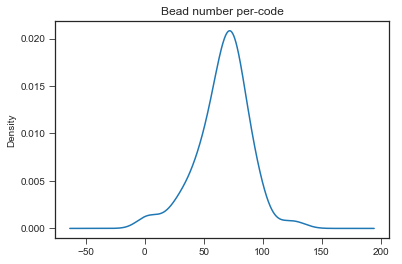

In [185]:
data_sampled = balance_data(extract_set[((extract_set.confidence > 0.95) & (extract_set['Cy5_FF_min_bkg'] > 0))].loc[extract_set.set=='2000 nM', ['code', 'info.sequence', 'Cy5_FF_min_bkg']], 'up-random', channel = 'Cy5_FF_min_bkg')

In [186]:
data_sampled

Cy5_FF_min_bkg  code
0              7492.0  25.0
1               453.0  56.0
2              1564.0  55.0
3              2009.0   9.0
4               663.0  82.0
5              1438.5  33.0
6               194.0  83.0
7              6685.5  12.0
8              4671.5  28.0
9              1192.0  23.0
10               43.0  83.0
11              698.0  11.0
12              749.0  68.0
13               20.5   8.0
14             4730.5  58.0
15             4020.5  58.0
16             9242.0  45.0
17             4158.0  58.0
18             3836.0  58.0
19             9674.0  47.0
20             1162.0  29.0
21             8669.5  52.0
22             4060.0  58.0
23             4649.0  58.0
24             3830.5  58.0
25             4757.0  58.0
26              318.5   8.0
27            10333.0  46.0
28            11318.0  45.0
29             4947.5  58.0
...               ...   ...
12320          5190.5   1.0
12321          5190.5   1.0
12322          5190.5   1.0
12323          5190.5   1.0
12324          5190.5   1.0
12325          5190.5   1.0
12326          5190.5   1.0
12327          5190.5   1.0
12328          5190.5   1.0
12329          5190.5   1.0
12330          5190.5   1.0
12331          5190.5   1.0
12332          5190.5   1.0
12333          5190.5   1.0
12334          5190.5   1.0
12335          5190.5   1.0
12336          5190.5   1.0
12337          5190.5   1.0
12338          5190.5   1.0
12339          5190.5   1.0
12340          5190.5   1.0
12341          5190.5   1.0
12342          5190.5   1.0
12343          5190.5   1.0
12344          5190.5   1.0
12345          5190.5   1.0
12346          5190.5   1.0
12347          5190.5   1.0
12348          5190.5   1.0
12349          5190.5   1.0

[12350 rows x 2 columns]

In [187]:
data_per_step, data_per_step_all = step_sample(data_sampled, num_start=2, x_step=2, channel='Cy5_FF_min_bkg')

In [189]:
data_per_step_all

sample_size  code     id  Cy5_FF_min_bkg
0                2   0.0  12062           172.0
1                2   0.0  12017           172.0
2                2   1.0  12329          5190.5
3                2   1.0  12307          5190.5
4                2   2.0   7372          5589.0
5                2   2.0   5194          4784.0
6                2   3.0   4511          3923.5
7                2   3.0   2331          4071.0
8                2   4.0   4199          2085.0
9                2   4.0  10008          5130.0
10               2   5.0  11865          3075.0
11               2   5.0  11864          5253.5
12               2   6.0   1045          5288.5
13               2   6.0  11452          6830.0
14               2   7.0   8955           367.5
15               2   7.0   4645            66.5
16               2   8.0     13            20.5
17               2   8.0   5489            98.5
18               2   9.0   6585          2941.0
19               2   9.0   5128          2941.0
20               2  10.0   5720          1035.0
21               2  10.0  10047            79.0
22               2  11.0   2377          1230.5
23               2  11.0   2008           561.0
24               2  12.0   6790          7541.0
25               2  12.0   6828          7410.0
26               2  13.0   8088          9046.5
27               2  13.0   5648          4869.5
28               2  14.0   1062           601.0
29               2  14.0   1390          1242.0
...            ...   ...    ...             ...
24100          128  94.0  11262          9327.0
24101          128  94.0   3899         13943.0
24102          128  94.0  11284         11645.0
24103          128  94.0  11264         16855.0
24104          128  94.0  11267         10573.0
24105          128  94.0  11285         10909.0
24106          128  94.0   4472         10461.0
24107          128  94.0   3253          9606.0
24108          128  94.0  11256         11645.0
24109          128  94.0   3489          9625.0
24110          128  94.0  11297          9709.0
24111          128  94.0   2936         10016.0
24112          128  94.0    264         10626.5
24113          128  94.0  11307         16975.0
24114          128  94.0   6244          9709.0
24115          128  94.0   2931         14724.0
24116          128  94.0  11261         12940.5
24117          128  94.0   6204          8807.0
24118          128  94.0  11292         12940.5
24119          128  94.0   3365          6524.0
24120          128  94.0   1686         10776.0
24121          128  94.0  11305         10776.0
24122          128  94.0  11259         19318.0
24123          128  94.0  11295         10909.0
24124          128  94.0  11272          8192.0
24125          128  94.0   4139          8714.0
24126          128  94.0   2761         11063.0
24127          128  94.0  11253         12873.5
24128          128  94.0    924         10899.0
24129          128  94.0   2638          4834.0

[24130 rows x 4 columns]

C:\Users\bjorn\.virtualenvs\Bead_Analysis-zAy6Vl3A\lib\site-packages\seaborn\regression.py:277: RuntimeWarning:

invalid value encountered in log



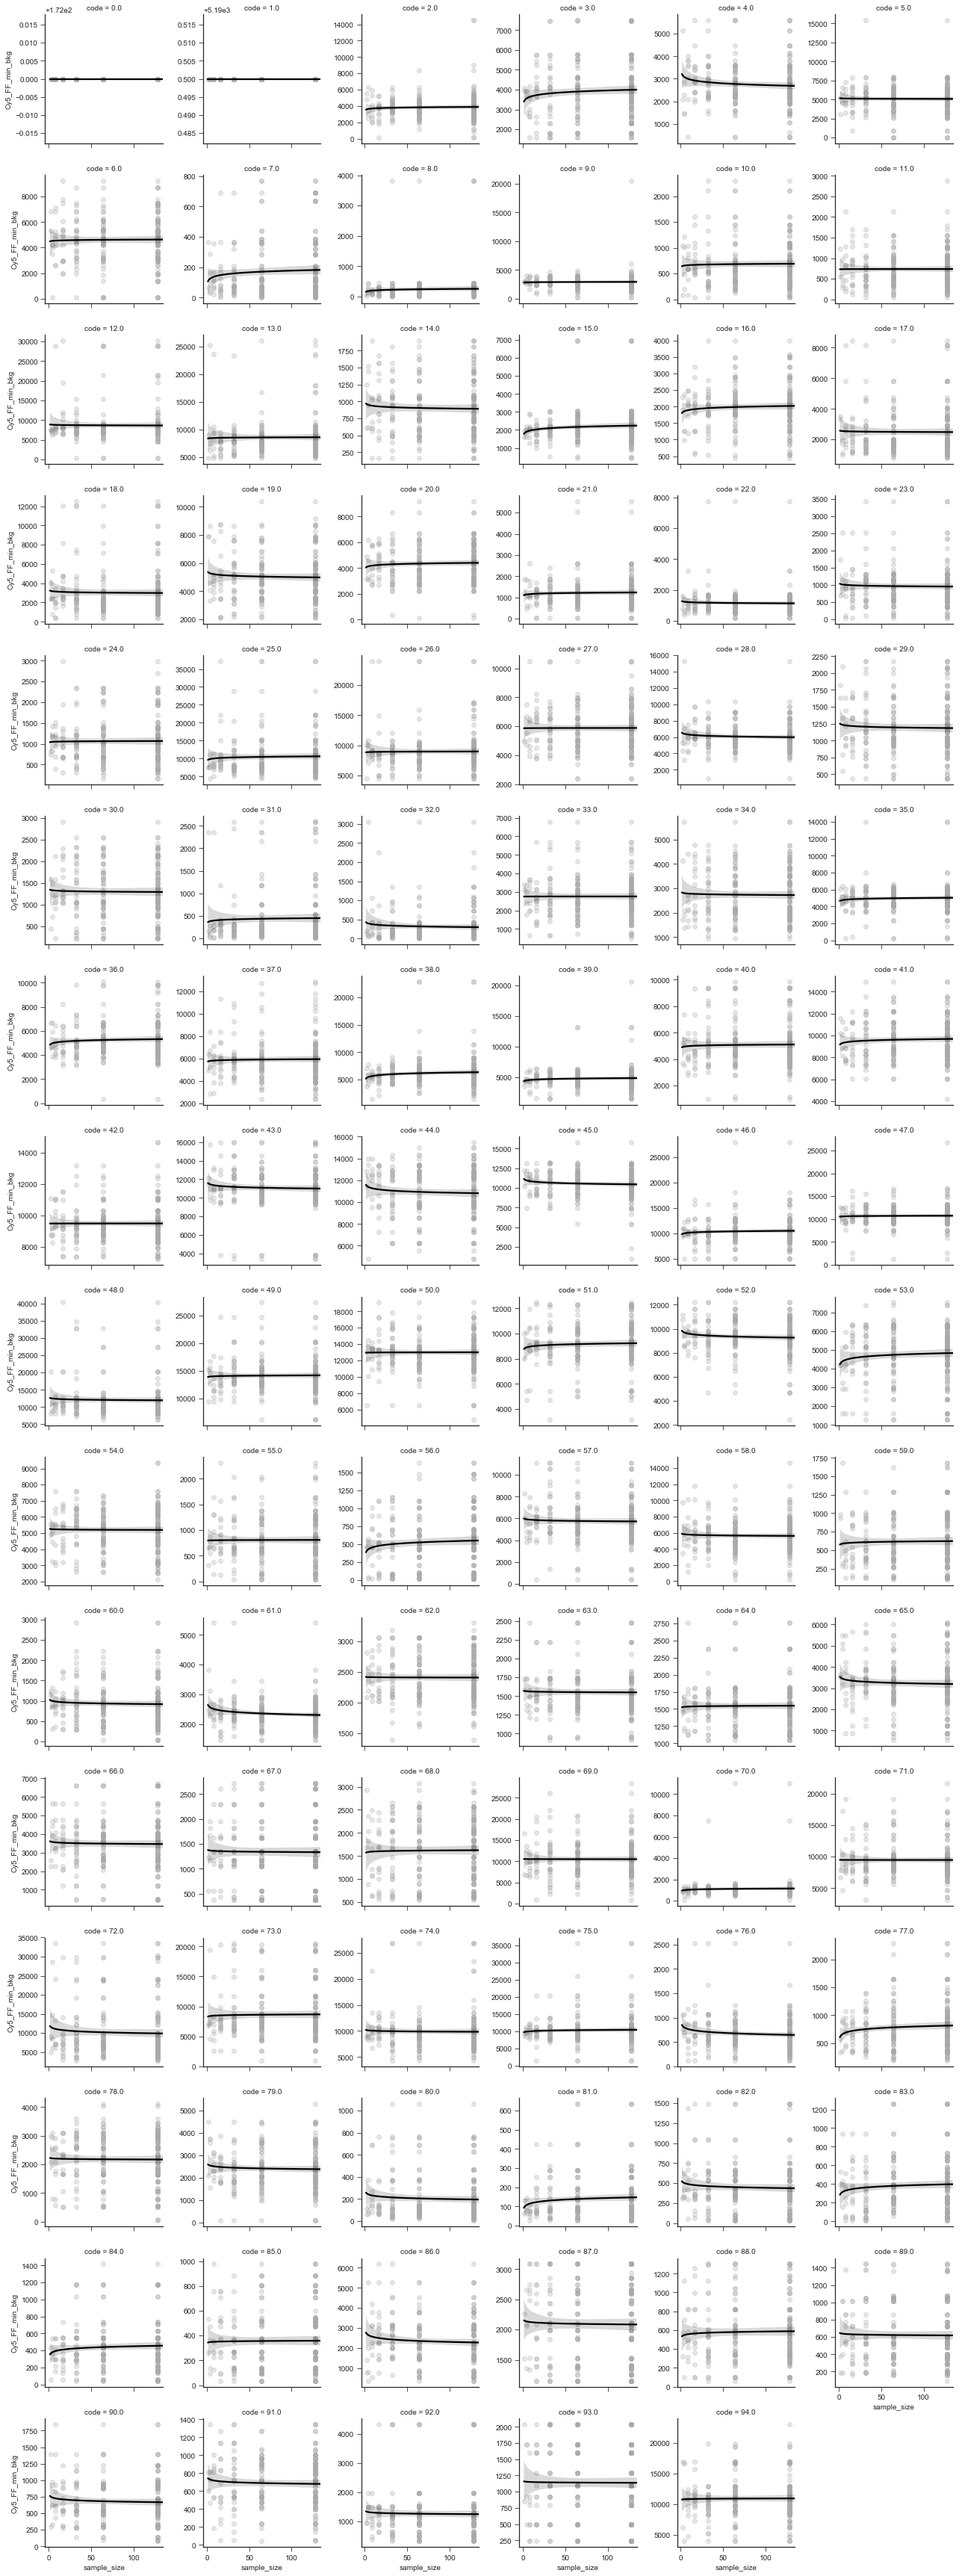

In [190]:
#g = sns.FacetGrid(data_per_step_all, col="code", col_wrap=4, sharey=False, xlim=(0,128))
g = sns.FacetGrid(data_per_step_all.sort_values('code'), col="code", col_wrap=6, sharey=False)

g.map(sns.regplot, 'sample_size', 'Cy5_FF_min_bkg', data=data_per_step_all, 
      logx=True, ci=95, n_boot=5000, 
      scatter=True, scatter_kws={'alpha':0.3, 'color':'darkgray'}, line_kws={'color':'black'})

In [319]:
# g.savefig('beads-per-code-stability - No-ShareY.png')

# Bead Report

In [200]:
figs = ratio_images['2000 nM', :, ['Dy', 'Sm', 'Tm', 'bkg', 'Eu', 'Cy5_FF']]
masks = find_mrbles['2000 nM', :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']]

In [201]:
figs_all_includes = figs.combine_first(masks)

In [202]:
mrbles_report = mrbles.report.BeadsReport(extract_set, figs_all_includes, 'Cy5_FF')

Total beads: 16760
Total images: 167600
Total estimated time required: 77 minutes


In [ ]:
mrbles_report.generate('filename.pdf')